# Проект: Продажи автомобилей в Казахстане 2019 год.

В данном датасете содержатся сведения о продажах новых автомобилей в Казахстане за первые девять месяцев 2019 года. Требуется провести анализ автомобильного рынка в целом — его объема, динамики и конкурентной ситуации — а также оценить положение автоцентра Меркур авто на рынке, включая анализ внешних и внутренних факторов. Поскольку данные содержат множество ошибок, перед началом анализа необходимо выполнить их предварительную обработку.

Этапы исследования:
1. Загрузка и предобработка данных;
2. Исследовательский анализ данных;
3. Анализ авторынка Казахстана;
4. Показатели эффективности Mercur Auto.

## 1. Загрузка и предобработка данных.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# открытие файла
df = pd.read_csv('C:/Users/Ирина/OneDrive/Рабочий стол/Проект авторынок/autokz2019.csv', decimal=',', sep=';')
pd.set_option('display.max_columns', None)
df.sample(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
26217,2019,Июль,Subaru Kazakhstan,Subaru,XV,Subaru XV,2019,Япония,Бензин,2,CVT (вариатор),4WD,SUV cars,Алматы,Subaru Motor Almaty,Физ. Лицо,наличный,1.0,28896.52089,28896.52089,г.Алматы,Внедорожники,Компактные SUV,K1,Импорт
3060,2019,Март,Astana Motors,Hyundai,Accent,Hyundai Accent HCr Elegance & Safety Pack,2019,Республика Казахстан,Бензин,"1,6",6 AT,2 WD,B,Шымкент,Hyundai Center Shimkent,Физ. Лицо,NaN,1.0,16949.60212,16949.60212,Южно-Казахстанская область,Легковые автомобили,B класс,B,Локальное производство
19646,2019,Февраль,Toyota Motor Kazakhstan,Lexus,RX,HE,2018,Япония,Бензин,2,AT,4WD,Среднеразмерные SUV Premium,Алматы,Лексус Алматы,Физ. Лицо,NaN,1.0,55972.05367,55972.05367,г.Алматы,Внедорожники,Среднеразмерные SUV,K2,Импорт
13756,2019,Май,Allur Auto,Jac,S3,Luxury 1.6 MT,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,NaN,ЭКСПОРТ,Allur Auto Rus,NaN,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
10000,2019,Январь,Astana Motors,Hyundai,Tucson,Hyundai Tucson ix35 FL Start,2018,Республика Казахстан,Бензин,2,6 AT,4 WD,C-SUV,Атырау,Caspi Auto Атырау,Физ. Лицо,NaN,1.0,24023.50943,24023.50943,Атырауская область,Внедорожники,Компактные SUV,K1,Локальное производство


Посмотрим общую информацию о датасете.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

В датасете 25 колонок, 39966 строк. Есть столбцы с пропусками. Необходимо изменить тип данных в некоторых столбцах.  

Для начала переименуем столбцы, приведем все названия к snake_case.

In [4]:
# словарь переименования: {старое_имя: новое_имя}
change_dict = {
    'Год': 'year',
    'Месяц': 'month',
    'Компания': 'company',
    'Бренд': 'brand',
    'Модель': 'model',
    'Модификация': 'modification',
    'Год выпуска': 'year_of_release',
    'Страна-производитель': 'country_of_origin',
    'Вид топлива': 'type_of_fuel',
    'Объём двиг, л,': 'engine_size',
    'Коробка передач': 'transmission_box',
    'Тип привода': 'type_of_drive',
    'Сегмент': 'segment',
    'Регион': 'region',
    'Наименование дилерского центра': 'dealer',
    'Тип клиента': 'client_type',
    'Форма расчета': 'payment_form',
    'Количество': 'quantity',
    'Цена, USD': 'price',
    'Продажа, USD': 'sale_price',
    'Область': 'area',
    'Сегментация 2013': 'segmentation_2013',
    'Класс 2013': 'class_2013',
    'Сегментация Eng': 'segment_eng',
    'Локализация производства': 'localization_of_production'
    
}

# применяем переименование
df = df.rename(columns=change_dict)

print("После переименования:")
print(df.columns.tolist())

После переименования:
['year', 'month', 'company', 'brand', 'model', 'modification', 'year_of_release', 'country_of_origin', 'type_of_fuel', 'engine_size', 'transmission_box', 'type_of_drive', 'segment', 'region', 'dealer', 'client_type', 'payment_form', 'quantity', 'price', 'sale_price', 'area', 'segmentation_2013', 'class_2013', 'segment_eng', 'localization_of_production']


In [5]:
# проверяем корректность замены колонок
df.sample(5)

,year,month,company,brand,model,modification,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,segment,region,dealer,client_type,payment_form,quantity,price,sale_price,area,segmentation_2013,class_2013,segment_eng,localization_of_production
38982,2019,Июль,Allur Auto,Jac,N120,шасси,2019,Республика Казахстан,Бензин,"3,8",MT,2WD,Малотоннажные грузовики,ЭКСПОРТ,Allur Auto Almaty,Юр. Лицо,безналичный,1.0,22031.687240,22031.687240,Экспорт область,Коммерческие автомобили,Среднетоннажные грузовики,O,Локальное производство
3503,2019,Апрель,Astana Motors,Hyundai,Accent,Hyundai Accent HCr Active,2018,Российская Федерация,Бензин,"1,6",6MT,2WD,B,Костанай,Hyundai Auto Kostanai,Юр. Лицо,NaN,1.0,14464.611760,14464.611760,Костанайская область,Легковые автомобили,B класс,B,Импорт
22790,2019,Август,Равон Моторс Казахстан,Ravon,Nexia R3,Optimum,2019,Республика Казахстан,Бензин,"1,5",MT,Передний,NaN,Атырау,Eurasia Motor Атырау,Физ. Лицо,NaN,1.0,9893.925137,9893.925137,Атырауская область,Легковые автомобили,B класс,B,Локальное производство
20462,2019,Январь,ММС Рус,Mitsubishi,Outlander,Instyle 4WD RUS CVT,2018,Российская Федерация,Бензин,2,CVT,4WD,Medium SUV,Костанай,Автодом Костанай,NaN,NaN,1.0,30766.583460,30766.583460,Костанайская область,Внедорожники,Компактные SUV,K1,Импорт
33975,2019,Май,Toyota Motor Kazakhstan,Toyota,LC Prado,54,2019,Япония,Бензин,"2,7",AT,4WD,Среднеразмерные SUV,Костанай,Тойота Центр Костанай,Юр. Лицо,NaN,1.0,42077.411440,42077.411440,Костанайская область,Внедорожники,Среднеразмерные SUV,K2,Импорт


Посмотрим основные статистические характеристики числовых столбцов.

In [6]:
df.describe()

,year,quantity,price,sale_price
count,39966.0,39960.000000,39966.000000,3.996600e+04
mean,2019.0,1.348198,28250.157462,3.375767e+04
std,0.0,2.373089,20005.756629,5.070245e+04
min,2019.0,-1.000000,7100.000000,-3.558825e+04
25%,2019.0,1.000000,15518.499690,1.660193e+04
50%,2019.0,1.000000,24282.267910,2.624896e+04
75%,2019.0,1.000000,32505.655770,3.500000e+04
max,2019.0,115.000000,328510.970600,3.778206e+06


Данные представлены только за 2019 год, в столбцах quantity и sale_price есть отрицательные значения, возможно был возврат автомобиля. Есть строка с quantity в 115 автомобилей, возможно это выброс.

Проверим пропуски.

In [7]:
df.isna().sum()

year                              0
month                             0
company                           0
brand                             0
model                             0
modification                   3591
year_of_release                 501
country_of_origin                 0
type_of_fuel                   3140
engine_size                    4258
transmission_box               3255
type_of_drive                  4289
segment                        6761
region                            0
dealer                            0
client_type                    7047
payment_form                  25928
quantity                          6
price                             0
sale_price                        0
area                              0
segmentation_2013                 0
class_2013                        0
segment_eng                       0
localization_of_production        0
dtype: int64

Удаляем колонки "modification", "payment_form", заполнить их не представляется возможным и данные из этих колонок не понадобятся для анализа. Кроме того, удаляем колонки "segment" и "segment_eng" (так как актуальная инфо в колонке segmentation_2013), "dealer" (так как повторяет колонку "company"), "localization_of_production" (совпадает с колонкой "country_of_origin").

In [8]:
df = df.drop(columns=['modification', 'payment_form', 'segment', 'dealer', 'segment_eng', 'localization_of_production'])

In [9]:
# смотрим еще раз пропуски после удаления столбцов
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_of_release       501
country_of_origin       0
type_of_fuel         3140
engine_size          4258
transmission_box     3255
type_of_drive        4289
region                  0
client_type          7047
quantity                6
price                   0
sale_price              0
area                    0
segmentation_2013       0
class_2013              0
dtype: int64

Проверим колонки на наличие неявных дубликатов и заодно заполним пропуски, где это возможно.

**Столбцы year и month.**

Проверим столбцы с указанием месяца и года. За кокой период представлены данные.

In [10]:
df['year'].unique()

array([2019], dtype=int64)

In [11]:
df['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Данные представлены за 9 месяцев 2019 года (с января по сентябрь). Для удобства создадим единый столбец date_of_sale из столбцов год и месяц (число месяца ставим последний день - 30 или 31).

In [12]:
# словарь для перевода русских названий месяцев в числа
month_map = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# преобразуем месяц в число
df['month_num'] = df['month'].map(month_map)

# создаём дату (первое число месяца)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_num'].astype(str) + '-01')

# добавляем смещение до конца месяца
df['date_of_sale'] = df['date'] + pd.offsets.MonthEnd(1)

# удаляем промежуточные столбцы
df = df.drop(['month_num', 'date'], axis=1)

In [13]:
# проверяем как заполнился столбец date_of_sale
df.sample(5)

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
33870,2019,Апрель,Toyota Motor Kazakhstan,Toyota,LC Prado,2019,Япония,Бензин,"2,7",AT,4WD,Алматы,Физ. Лицо,1.0,42129.16977,42129.16977,г.Алматы,Внедорожники,Среднеразмерные SUV,2019-04-30
26661,2019,Январь,Toyota Motor Kazakhstan,Toyota,Camry,2018,Российская Федерация,Бензин,2.5,AT,FF,Нур-Султан,Физ. Лицо,1.0,31291.34782,31291.34782,г.Нур-Султан,Легковые автомобили,D класс,2019-01-31
24620,2019,Июль,Renault Россия,Renault,Kaptur,2019,Российская Федерация,NaN,NaN,NaN,NaN,Алматы,Корп. клиент,1.0,16797.65246,16797.65246,г.Алматы,Внедорожники,Субкомпактные SUV,2019-07-31
19553,2019,Сентябрь,Toyota Motor Kazakhstan,Lexus,NX,2019,Япония,гибрид,2.5,CVT (вариатор),4WD,Нур-Султан,Физ. Лицо,1.0,45884.00338,45884.00338,г.Нур-Султан,Внедорожники,Среднеразмерные SUV,2019-09-30
13005,2019,Июль,Nissan Manufacturing RUS,Infiniti,QX50,2019,Япония,Бензин,2,AT,AWD,Алматы,NaN,1.0,48933.60297,48933.60297,г.Алматы,Внедорожники,Среднеразмерные SUV,2019-07-31


**Столбец company.**

Проверяем уникальные значения в столбце "company".

In [14]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [15]:
# смотрим количество уникальных значений
len(df['company'].unique())

40

In [16]:
# удаляем лишние пробелы по краям названий
df['company'] = df['company'].str.strip()
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors',
       'Hyundai Com Trans Kazakhstan', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors'],
      dtype=object)

In [17]:
# убираем неявные дубликаты
df.company = df.company.replace('Caspian Motors', 'Каспиан Моторс')
df.company = df.company.replace('Autokapital', 'Автокапитал')
df.company = df.company.replace('MMC RUS', 'ММС Рус')
df.company = df.company.replace('Ravon Motors Kazakstan', 'Равон Моторс Казахстан')
df.company = df.company.replace('Hino Motors', 'Хино Моторс Казахстан')
df.company = df.company.replace('Mercur Autos', 'Mercur Auto')

In [18]:
# смотрим количество уникальных значений
len(df['company'].unique())

33

Количество уникальных значений сократилось. Пропусков в этом столбце нет, идем дальше.

**Столбец brand.**

In [19]:
# смотрим уникальные значения
df['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

Здесь все в порядке.

**Столбец model.**

In [20]:
df['model'].unique()

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', 'BJ3253DMPKB-AD', '2217', '2310', '2705',
       '2752', '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Santa Fe', 'Sonata', 'TQ-1/H-1', 'County', 'H350',
       'HD 160', 'HD 170', 'HD 65', 'HD 78', 'Universe', 'Tucson', 'Q50',
       'QX50', 'QX60', 'QX80', 'D-MAX', 'NMR', 'NPR', 'Daily', 'Daily A',
       'Daily V', 'Stralis', 'Tipper', 'S3', 'S5', 'F-Pace', 'F-Type',
       'XE', 'XF', 'XJ', '4308', '4311', '43118', '43253', '43502',
       '44108', '45142', '45143', '53215', '53504', '53605', '54115',
       '5490', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', 'Cerato', 'Optima', 'Picanto', 'Quoris',
       'Rio', 'Sorento', 'Soul', 'Sportage', '4x4', 'Granta', 'Kalina',
       '

In [21]:
# проверяем количество уникальных
len(df['model'].unique())

273

In [22]:
# удаляем лишние пробелы по бокам (если они есть), приводим все значения к нижнему регистру
df.model = df.model.str.strip().str.lower()

# проверяем количество уникальных
len(df['model'].unique())

273

Количество уникальных значений не изменилось. Оставляем как есть.

**Столбец year_of_release.**

In [23]:
# смотрим уникальные значения
df['year_of_release'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

Здесь я корректирую данные в столбце "year_of_release"

In [24]:
df['year_of_release'] = df['year_of_release'].str.replace('\xa0', '')

In [25]:
df['year_of_release'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011'],
      dtype=object)

Пропуски в столбце year_of_release заполнить не представляется возможным.

**Столбец country_of_origin.**

In [26]:
# смотрим уникальные значения
df['country_of_origin'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

Для экономии места (сокращение размера датасета) мы можем закодировать страны в alpha3 (RUS, KAZ, USA и т.д.). Для этого мы ищем кодировки в сети Интернет. Первая ссылка будет на сайт Лебедева.

In [27]:
countries = pd.read_table('https://www.artlebedev.ru/country-list/tab/')

In [28]:
countries.sample(3)

,name,fullname,english,alpha2,alpha3,iso,location,location-precise
207,Тонга,Королевство Тонга,Tonga,TO,TON,776,Океания,Полинезия
164,Питкерн,NaN,Pitcairn,PN,PCN,612,Океания,Полинезия
133,Монтсеррат,NaN,Montserrat,MS,MSR,500,Америка,Карибский бассейн


Для кодирования используем метод замены по словарю, для этого мы объединяем два столбца датасета: название страны будет ключом, код - значением. Метод zip сшивает два столбца в массив кортежей, к которому мы применяем dict, таким образом создаем словарь. То же самое мы проделаем для полных названий. 

In [29]:
names_dict = dict(zip(countries.name, countries.alpha3))

In [30]:
full_names_dict = dict(zip(countries.fullname, countries.alpha3))

In [31]:
# смотрим какие значения есть в колонке country_of_origin
(
    df.country_of_origin.value_counts()
    .reset_index()
    .rename(columns={'index': 'Страна', 'country_of_origin': 'Количество упоминаний'})
    )

,Количество упоминаний,count
0,Республика Казахстан,19369
1,Российская Федерация,12846
2,Япония,4595
3,Турция,1167
4,Таиланд,970
5,США,289
6,Германия,265
7,UK,197
8,Китай,94
9,Узбекистан,70


Применяем оба созданных словаря к столбцу со странами.

In [32]:
df.country_of_origin = df.country_of_origin.map(lambda cell: full_names_dict.get(cell, cell))

In [33]:
df.country_of_origin = df.country_of_origin.map(lambda cell: names_dict.get(cell, cell))

Проверяем.

In [34]:
df.country_of_origin.value_counts().reset_index()

,country_of_origin,count
0,KAZ,19369
1,RUS,12846
2,JPN,4595
3,TUR,1167
4,THA,970
5,США,289
6,DEU,265
7,UK,197
8,CHN,94
9,UZB,70


Остатки меняем руками.

In [35]:
df.country_of_origin = (
    df.country_of_origin.str.replace('США', 'USA').str.replace('Корея', 'KOR')
    .str.replace('UK', 'GBR').str.replace('Белоруссия', 'BLR')
) 

In [36]:
# еще раз проверяем
df.country_of_origin.value_counts().reset_index()

,country_of_origin,count
0,KAZ,19369
1,RUS,12846
2,JPN,4595
3,TUR,1167
4,THA,970
5,USA,289
6,DEU,265
7,GBR,197
8,CHN,94
9,UZB,70


**Столбец type_of_fuel.**

In [37]:
# смотрим уникальные значения в столбце type_of_fuel
df.type_of_fuel.value_counts().reset_index()

,type_of_fuel,count
0,Бензин,34801
1,Дизель,1762
2,бензин,159
3,дизель,41
4,2,23
5,"1,6",14
6,гибрид,10
7,Электричество,10
8,0,3
9,Электро,3


In [38]:
# убираем лишние пробелы (если они есть), приводим все значения к нижнему регистру
df.type_of_fuel = df.type_of_fuel.str.strip().str.lower()

# убираем дубликаты
df.type_of_fuel = df.type_of_fuel.replace('электро', 'электричество')

Посмотрим строки со значениями '2', '1,6', '0'.

In [39]:
df.loc[df['type_of_fuel'].isin(['2', '1,6', '0'])]

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
23723,2019,Январь,Renault Россия,Renault,duster,2019,RUS,2,MT,4WD,4WD,Уральск,NaN,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-01-31
23724,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23725,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23726,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,AT,4WD,4WD,Кызылорда,NaN,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,2019-01-31
23727,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23728,2019,Январь,Renault Россия,Renault,duster,2018,RUS,"1,6",MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23729,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,AT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23730,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,AT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23731,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23732,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31


В UAZ 3741 используется бензин, так что вместо значения "0" укажем "бензин". 

In [40]:
df.type_of_fuel = df.type_of_fuel.str.replace('0', 'бензин')

В остальных строках есть смещение значений в столбцах engine_size и transmission_box (нужно переместить значения из engine_size в transmission_box и из type_of_fuel в engine_size).

In [41]:
# создаем временные переменные для хранения значений
temp_engine_size = df.loc[df['type_of_fuel'].isin(['2', '1,6']), 'engine_size'].copy()
temp_type_of_fuel = df.loc[df['type_of_fuel'].isin(['2', '1,6']), 'type_of_fuel'].copy()

# меняем местами значения
df.loc[df['type_of_fuel'].isin(['2', '1,6']), 'transmission_box'] = temp_engine_size
df.loc[df['type_of_fuel'].isin(['2', '1,6']), 'engine_size'] = temp_type_of_fuel

In [42]:
# проверяем как заменились значения
df.loc[df['type_of_fuel'].isin(['2', '1,6'])]

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
23723,2019,Январь,Renault Россия,Renault,duster,2019,RUS,2,2,MT,4WD,Уральск,NaN,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-01-31
23724,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,AT,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23725,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,AT,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23726,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,AT,4WD,Кызылорда,NaN,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,2019-01-31
23727,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,MT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23728,2019,Январь,Renault Россия,Renault,duster,2018,RUS,"1,6","1,6",MT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23729,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,AT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23730,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,AT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23731,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,MT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23732,2019,Январь,Renault Россия,Renault,duster,2018,RUS,2,2,MT,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31


Теперь необходимо заменить значения в столбце type_of_fuel. У Renault duster с объемом двигателя 1.6 и 2 используется бензин. Аналогичная ситуация с Renault sandero объемом 1.6. Заполним колонку type_of_fuel.

In [43]:
# меняем значения
df.type_of_fuel = df.type_of_fuel.str.replace('2', 'бензин').str.replace('1,6', 'бензин')

In [44]:
# проверяем уникальные значения
df.type_of_fuel.value_counts().reset_index()

,type_of_fuel,count
0,бензин,35000
1,дизель,1803
2,электричество,13
3,гибрид,10


Кодируем тип топлива (F - бензин, D - дизель, E - электричество, HYB - гибрид).

In [45]:
df.type_of_fuel = (
    df.type_of_fuel.str.replace('бензин', 'F').str.replace('дизель', 'D')
    .str.replace('электричество', 'E').str.replace('гибрид', 'HYB')
)

In [46]:
# еще раз смотрим уникальные значения
df.type_of_fuel.unique()

array(['F', 'D', nan, 'HYB', 'E'], dtype=object)

In [47]:
# считаем пропуски в колонке type_of_fuel
df.type_of_fuel.isna().sum()

3140

По возможности заполним пропуски в колонке type_of_fuel следующим образом: для каждой модели автомобиля найдем наиболее часто встречающееся значение type_of_fuel, этими значениями заполним пропуски. 

In [48]:
# фильтруем датасет, убирая строки с пропусками в type_of_fuel
df_not_nan = df[df['type_of_fuel'].notna()]

# сначала найдем наиболее часто встречающееся значение type_of_fuel для каждой модели
mode_per_model = df_not_nan.groupby('model')['type_of_fuel'].apply(lambda x: x.mode()[0]).to_dict()

# затем создаем маску для пропущенных значений и заполняем их
missing_mask = df['type_of_fuel'].isna()
df.loc[missing_mask, 'type_of_fuel'] = df.loc[missing_mask, 'model'].map(mode_per_model)

Смотрим сколько строк с пропусками осталось.

In [49]:
df.type_of_fuel.isna().sum()

899

**Столбец engine_size.**

In [50]:
# смотрим уникальные значения
df.engine_size.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

Для начала посмотрим явно выбивающиеся значения: 400 Л.С. и 88 KWH.

In [51]:
df[df['engine_size'] == '400 Л.С.']

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
39544,2019,Февраль,Almaty Motors Premium,Jaguar,i-pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,2019-02-28
39545,2019,Апрель,Almaty Motors Premium,Jaguar,i-pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39546,2019,Июнь,Almaty Motors Premium,Jaguar,i-pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.0,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,2019-06-30


Это Jaguar i-pace, в колонке type_of_fuel тип топлива - Е (электричество), поэтому в колонке engine_size укажем 0.

In [52]:
df.engine_size = df.engine_size.str.replace('400 Л.С.', '0', regex=True)

In [53]:
df[df['engine_size'] == '88 KWH']

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
39818,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39819,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39820,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39821,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39822,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39823,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39824,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39825,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39826,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39827,2019,Июль,Allur Auto,ANKAI,hff6124g03ev3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31


Аналогичная ситуация. Тип топлива - электричество, ставим в колонке engine_size 0.

In [54]:
df.engine_size = df.engine_size.str.replace('88 KWH', '0')

Далее обработаем неявные дубликаты.

In [55]:
# заменяем запятые на точки
df.engine_size = df.engine_size.str.replace(',', '.')
    
# удаляем возможные оставшиеся точки (если их несколько)
df.engine_size = df.engine_size.str.rstrip('.')

# заменяем '#Н/Д' на NaN
df['engine_size'] = df['engine_size'].replace('#Н/Д', np.nan)

# убираем букву L (регистронезависимо) из значений
df['engine_size'] = df['engine_size'].str.replace(r'L', '', case=False, regex=True)

# также убираем возможные пробелы после удаления L
df['engine_size'] = df['engine_size'].str.strip()

In [56]:
# еще раз смотрим уникальные значения
df.engine_size.unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', nan, '2.8', '4.3', '1.6 MPI',
       '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT', '2.5 CRDI WGT',
       '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI', '2.0', '3.5', '5.6',
       '5.2', '3.0', '5', '1.598', '1.248', '1.998', '2.359', '1.999',
       '3.342', '1.591', '3.47', '1.69', '1.774', '4.6', '1.8', '10.5',
       '4', '5.5', '12', '12.8', '11', '2.2', '1.2', '1.485', '13',
       '1.33', '4.0', '2.4G', '2.693', '3.8', '1.2T', '3.6', '7.6', '4.9',
       '2.0h', '2.9', '0', '4.98', '8.4', '6.5'], dtype=object)

In [57]:
# оставляем только цифры и точки, удаляем все остальное
df['engine_size'] = df['engine_size'].astype(str).str.replace(r'[^\d.]', '', regex=True)

Далее нужно изучить строки со значения более 10, возможно необходимо сместить запятую. Для этого для начала переведем значения в числовой тип.

In [58]:
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

Делаем срез строк со значениями в столбце engine_size более 10.

In [59]:
df.loc[df['engine_size'] > 10]

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
399,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,26.7,MT,4WD,Костанай,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
400,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,25.7,MT,4WD,Атырау,Физ. Лицо,1.0,10536.24452,1.053624e+04,Атырауская область,Внедорожники,Субкомпактные SUV,2019-04-30
401,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,24.7,MT,4WD,Костанай,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
402,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,23.7,MT,4WD,Рудный,Физ. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
403,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,22.7,MT,4WD,Рудный,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
404,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,21.7,MT,4WD,Нур-Султан,Физ. Лицо,1.0,10536.24452,1.053624e+04,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-04-30
405,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,20.7,MT,4WD,Караганда,Юр. Лицо,1.0,10536.24452,1.053624e+04,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-30
406,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,19.7,MT,4WD,Костанай,Физ. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
407,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,18.7,MT,4WD,Усть-Каменогорск,Юр. Лицо,1.0,10536.24452,1.053624e+04,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-04-30
408,2019,Апрель,Вираж,Chevrolet,niva,2019,KAZ,F,17.7,MT,4WD,Караганда,Физ. Лицо,1.0,10536.24452,1.053624e+04,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-30


Судя по столбцу class_2013 большинство автомобилей относятся к классам: Большие автобусы и Крупнотоннажные грузовики, исключение составляет Chevrolet niva. Такой моделе 2019 года выпуска соотвествует объем двателя 1.7. Сделаем замену.

In [60]:
df.loc[(df.brand == 'Chevrolet') & (df.model == 'niva'), 'engine_size'] = 1.7

In [61]:
# округлим все значения до 1 знака после запятой
df['engine_size'] = df['engine_size'].round(1)

# преобразуем данные обратно в строковой формат
#df['engine_size'] = df['engine_size'].astype(str)
#df['engine_size'] = df['engine_size'].replace('nan', np.nan)

In [62]:
df['engine_size'].unique()

array([ 1.4,  2. ,  3. ,  4.4,  6.6,  1.5,  1.6,  2.4,  1.7,  6.2,  2.5,
        nan,  2.7,  2.8,  4.3,  3.9,  7.5, 12.3,  3.5,  5.6,  8.7,  5.2,
        5. ,  1.2,  3.3,  1.8,  4.6,  5.7, 10.5,  4. ,  5.5, 12. , 12.8,
       11. ,  2.2, 13. ,  1.3,  3.8,  3.6,  7.6,  4.9,  2.9,  0. ,  8.4,
        6.7,  6.5])

Посмотрим сколько пропущенных значений в столбце engine_size и по возможности заполним пропуски. 

In [63]:
df.engine_size.isna().sum()

4262

По возможности заполним пропуски в колонке engine_size аналогично как в случае со столбцом type_of_fuel - выявим моду в столбце engine_size для каждой модели автомобиля. 

In [64]:
df_not_nan = df[df['engine_size'].notna()]

# сначала найдем наиболее часто встречающееся значение engine_size для каждой модели
mode_per_model = df_not_nan.groupby('model')['engine_size'].apply(lambda x: x.mode()[0]).to_dict()

# затем создаем маску для пропущенных значений и заполняем их
missing_mask = df['engine_size'].isna()
df.loc[missing_mask, 'engine_size'] = df.loc[missing_mask, 'model'].map(mode_per_model)

In [65]:
# снова проверяем количество пропусков
df.engine_size.isna().sum()

1806

**Столбец transmission_box.**

In [66]:
# смотрим уникальные значения
df.transmission_box.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М',
       'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

In [67]:
# удаляем все пробелы
df['transmission_box'] = df['transmission_box'].str.replace(' ', '')

# заменяем '#Н/Д' на NaN
df['transmission_box'] = df['transmission_box'].replace('#Н/Д', np.nan)

# приводим к единому регистру (нижнему)
df['transmission_box'] = df['transmission_box'].str.lower()

In [68]:
df.transmission_box.unique()

array(['s-tronic', 'tiptronic', 'акпп', 'акп', 'steptronic', 'at', '6ат',
       '5мт', 'mt', '8at', 'powershifts6', '6at', nan, 'мех.', '6mt',
       '5at', 'мкпп', '7dct', 'мт', 'cvt', 'dct', '4ат', '6мт', '4at',
       '8ат', '5mt', 'amt', 'cvt(вариатор)', 'cvt(вариatор)',
       'cvt(вaриatор)', '7g-tronic', '9g-tronic', '12at', '12ат', '5ат',
       '7ат', '7at', '6m/t', 'pdk', '8-ступакпп', '8', '8акпп',
       '8акппtiptronics', '7акпп(pdk)', '7акппpdk', '8акпп(pdk)', 'ат',
       'аt', 'мt', '0', '7dsg', '6dsg', 'dsg', '6a', '6а', '5m', 'a/t',
       'm/t', 'мкп', '5м', 'м/t', '7акп', 'а/t', '8a', 'tdi', '9at',
       'редуктор'], dtype=object)

Далее выделим только два значения: механика (МТ) и автомат (АТ). В случае, если значение содержит 'мт', 'mt', 'мех.', 'мкпп', 'm/t', 'мt', 'м/t' ставим МТ. В остальных случаях ставим АТ.

In [69]:
# список значений, соответствующих ручной трансмиссии (MT)
mt_keywords = ['мт', 'mt', 'мех.', 'мкпп', 'm/t', 'мt', 'м/t']

# функция для преобразования значений, исключая Nan-значения
def classify_transmission(cell):
    if pd.isna(cell):
        return np.nan  # оставляем как NaN
    return 'MT' if cell in mt_keywords else 'AT'

# применяем функцию
df.transmission_box = df.transmission_box.apply(classify_transmission)

# проверяем результат
df['transmission_box'].unique()

array(['AT', 'MT', nan], dtype=object)

Смотрим пропуски.

In [70]:
df.transmission_box.isna().sum()

3259

Заполняем пропуски.

In [71]:
df_not_nan = df[df['transmission_box'].notna()]

# сначала найдем наиболее часто встречающееся значение transmission_box для каждой модели
mode_per_model = df_not_nan.groupby('model')['transmission_box'].apply(lambda x: x.mode()[0]).to_dict()

# Затем создаем маску для пропущенных значений и заполняем их
missing_mask = df['transmission_box'].isna()
df.loc[missing_mask, 'transmission_box'] = df.loc[missing_mask, 'model'].map(mode_per_model)

In [72]:
df.transmission_box.isna().sum()

1130

Количество пропусков сократилось.

**Столбец type_of_drive.**

In [73]:
# смотрим уникальные значения
df.type_of_drive.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [74]:
# удаляем все пробелы
df['type_of_drive'] = df['type_of_drive'].str.replace(' ', '')

# заменяем '#Н/Д' на NaN
df['type_of_drive'] = df['type_of_drive'].replace('#Н/Д', np.nan)

# заменяем '0' на NaN
df['type_of_drive'] = df['type_of_drive'].replace('0', np.nan)

# приводим к единому регистру (нижнему)
df['type_of_drive'] = df['type_of_drive'].str.lower()

Смотрим уникальные значения после преобразования.

In [75]:
df.type_of_drive.unique()

array(['передний', 'fwd', 'quattro', 'задний', 'полный', 'awd', '4wd',
       '4х2.2', nan, 'rwd', '2wd', '4x4', '4х4', '4x2', '4х2', 'астана',
       'передний(ff)', 'ff', '4motion'], dtype=object)

Посмотри строки с выбивающимся значением "астана".

In [76]:
df.loc[df.type_of_drive == 'астана']

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
15771,2019,Май,ТК КАМАЗ,KAMAZ,65116,2019,KAZ,D,NaN,MT,астана,Нур-Султан,Юр. Лицо,1.0,55655.86316,55655.86316,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,2019-05-31
39549,2019,Май,ТК КАМАЗ,KAMAZ,45141,2019,KAZ,D,NaN,MT,астана,Нур-Султан,Юр. Лицо,1.0,53963.81966,53963.81966,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,2019-05-31


In [77]:
# заменяем 'астана' на NaN
df['type_of_drive'] = df['type_of_drive'].replace('астана', np.nan)

In [78]:
# меняем букву x (заменяем на английскую)
df['type_of_drive'] = df['type_of_drive'].str.replace(r'х', 'x', case=False, regex=True)

Еще раз выводим уникальные значения.

In [79]:
df.type_of_drive.unique()

array(['передний', 'fwd', 'quattro', 'задний', 'полный', 'awd', '4wd',
       '4x2.2', nan, 'rwd', '2wd', '4x4', '4x2', 'передний(ff)', 'ff',
       '4motion'], dtype=object)

В итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное.

In [80]:
# создаем условия для каждого типа привода
conditions = [
    # 4WD (полный привод)
    df['type_of_drive'].str.contains('полный|4wd|4x4|4motion|quattro|awd', case=False, na=False),
    
    # RWD (задний привод)
    df['type_of_drive'].str.contains('задний|rwd', case=False, na=False),
    
    # 2WD (привод на 2 колеса)
    df['type_of_drive'].str.contains('2wd|4x2\.2|4x2', case=False, na=False),
    
    # FWD (передний привод)
    df['type_of_drive'].str.contains('передний|fwd|передний\(ff\)|ff', case=False, na=False)
]

# соответствующие значения для каждого условия
choices = ['4WD', 'RWD', '2WD', 'FWD']

# применяем условия (значения не попавшие ни под одно условие останутся NaN)
df['type_of_drive'] = np.select(conditions, choices, default=np.nan)
df['type_of_drive'] = df['type_of_drive'].replace('nan', np.nan)

Проверяем результат.

In [81]:
df.type_of_drive.unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

Теперь смотрим количество пропусков.

In [82]:
df.type_of_drive.isna().sum()

4411

Заполняем пропуски.

In [83]:
df_not_nan = df[df['type_of_drive'].notna()]

# сначала найдем наиболее часто встречающееся значение type_of_drive для каждой модели
mode_per_model = df_not_nan.groupby('model')['type_of_drive'].apply(lambda x: x.mode()[0]).to_dict()

# затем создаем маску для пропущенных значений и заполняем их
missing_mask = df['type_of_drive'].isna()
df.loc[missing_mask, 'type_of_drive'] = df.loc[missing_mask, 'model'].map(mode_per_model)

In [84]:
df.type_of_drive.isna().sum()

1815

Количество пропусков уменьшилось.

**Столбец region (регион продажи).**

Смотрим уникальные значения. 

In [85]:
df.region.unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

Здесь все в порядке, идем дальше.

**Столбец client_type.**

In [86]:
# смотрим уникальные
df.client_type.unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

In [87]:
# удаляем все пробелы
df['client_type'] = df['client_type'].str.replace(' ', '')

# приводим к единому регистру (нижнему)
df['client_type'] = df['client_type'].str.lower()

In [88]:
df.client_type.unique()

array(['физ.лицо', 'юр.лицо', nan, 'юридическое', 'физическое', 'физлицо',
       'юрлицо', 'корп.клиент'], dtype=object)

Оставим только два значения в этом столбце: 'юр.лицо' и 'физ.лицо'.

In [89]:
# делаем словарь
replacements = {
    'юридическое': 'юр.лицо',
    'юрлицо': 'юр.лицо',
    'физическое': 'физ.лицо',
    'физлицо': 'физ.лицо',
    'корп.клиент': 'юр.лицо'
}

# меняем значения
df.client_type = df.client_type.replace(replacements, regex=False)

# проверяем результат
df.client_type.unique()

array(['физ.лицо', 'юр.лицо', nan], dtype=object)

Посмотрим пропуски.

In [90]:
df.client_type.isna().sum()

7047

Можно попробовать заполнить пропуски следующим образом: если в колонке количество автомобилей значение больше 1, то это физ.лицо, в остальных случаях - юр.лицо. Но для начала посмотрим какое значение quantity обычно для физ.лица и юр.лица.

In [91]:
# выбираем только те строки, в которых в колонке тип клиента указано значение "физ.лицо"
only_natural_person = df.loc[df.client_type == 'физ.лицо']

# смотрим статистику по столбцу quantity
only_natural_person.quantity.describe()

count    24733.000000
mean         1.000364
std          0.039709
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: quantity, dtype: float64

75% данных соответствует значению 1, есть максимальное значение равное 7, стандартное отклонение небольшое. К тому же юридические лица тоже могут приобретать автомобили в количестве 1.

In [92]:
# выбираем только те строки, в которых в колонке тип клиента указано значение "юр.лицо"
only_legal_entity = df.loc[df.client_type == 'юр.лицо']

# смотрим статистику по столбцу quantity
only_legal_entity.quantity.describe()

count    8186.000000
mean        1.040801
std         1.138238
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        70.000000
Name: quantity, dtype: float64

Ситуация аналогичная. Много строк с количеством, равным 1.

Возможно есть зависимость со столбцом segmentation_2013. Посмотрим какие значения в этом столбце характерны для физлиц и юрлиц.

In [93]:
# значения для физлиц
only_natural_person.segmentation_2013.value_counts().reset_index()

,segmentation_2013,count
0,Внедорожники,11962
1,Легковые автомобили,11702
2,Коммерческие автомобили,812
3,Пикапы,183
4,Минивэны,74


In [94]:
# значения для юрлиц
only_legal_entity.segmentation_2013.value_counts().reset_index()

,segmentation_2013,count
0,Внедорожники,2739
1,Коммерческие автомобили,2688
2,Легковые автомобили,2014
3,Пикапы,710
4,Минивэны,35


Категория "Коммерческие автомобили" есть и у физлиц и у юрлиц. Зависимости нет. Оставим пропуски в колонке client_type как есть.

**Столбец quantity.**

In [95]:
# смотрим уникальные
df.quantity.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

Приведем значения к целочисленному типу и посмотрим строку со значением "-1".

In [96]:
# приводим значения к целочисленному формату
df['quantity'] = df['quantity'].astype('Int64')

In [97]:
# выбираем строку со значением -1 в столбце quantity
df.loc[df.quantity == -1]

,year,month,company,brand,model,year_of_release,country_of_origin,type_of_fuel,engine_size,transmission_box,type_of_drive,region,client_type,quantity,price,sale_price,area,segmentation_2013,class_2013,date_of_sale
25728,2019,Август,БИПЭК АВТО,Skoda,superb,2019,KAZ,F,2.0,AT,4WD,Тараз,NaN,-1,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс,2019-08-31


Это возврат автомобиля. Отрицательное значение и в столбце sale_price. Удалим эту строчку, она будет влиять на статистику. 

In [98]:
df = df.drop(df[df.quantity == -1].index)

Посчитаем строки с пропусками.

In [99]:
df.quantity.isna().sum()

6

Всего лишь 6 строк, удалим их.

In [100]:
df = df[~df.quantity.isna()]

In [101]:
# смотрим уникальные
df.quantity.unique()

<IntegerArray>
[  1,   2,   4,   3,   7,   5,   8,  10,   6,   9,  11,  19,  12,  70,  29,
  18,  37,  17,  15,  24,  14,  13,  25,  63,  23,  30,  21,  60,  22,  16,
  35,  28,  32,  54, 115,  46,  33,  47,  20,  66,  27,  50,  36,  26,  31,
  34,  40,  43,  51,  42,  38,  41, 100,  79,  62]
Length: 55, dtype: Int64

**Столбцы price и sale_price.**

Посмотрим статистику по этим столбцам и есть ли пропуски.

In [102]:
# выводим статистику
for col in ['price', 'sale_price']:
    print(f"\nСтатистика для колонки '{col}':")
    print(df[col].describe().round(2))


Статистика для колонки 'price':
count     39959.00
mean      28251.55
std       20006.63
min        7100.00
25%       15518.50
50%       24282.27
75%       32505.66
max      328510.97
Name: price, dtype: float64

Статистика для колонки 'sale_price':
count      39959.00
mean       33764.47
std        50704.02
min         7100.00
25%        16623.53
50%        26248.96
75%        35000.00
max      3778206.26
Name: sale_price, dtype: float64


Отрицательных значений нет, нулей тоже, посмотрим есть ли пропуски.

In [103]:
df.price.isna().sum()

0

In [104]:
df.sale_price.isna().sum()

0

Пропусков нет.

Сумма в столбце sale_price (сумма продажи) должна быть равна цене, умноженной на количество (столбцы price и quantity), необходимо это проверить. Для этого создадим проверочный столбец, в котором перемножим столбцы price и quantity. Далее найдем строки, где есть расхождение со столбцом sale_price. И выведем статистику по этим расхождениям. 

In [105]:
# cоздаем проверочный столбец
df['calculated_sale'] = df['price'] * df['quantity']

# проверяем, есть ли расхождения (выделяем такие строки)
discrepancies = df[df['calculated_sale'] != df['sale_price']].copy()

# считаем сумму расхождения для каждой строки из discrepancies 
discrepancies['difference'] = discrepancies['sale_price'] - discrepancies['calculated_sale']

# выводим статистику расхождений
discrepancies['difference'].describe()

count       471.0
mean    -0.000005
std      0.000054
min       -0.0007
25%      -0.00002
50%           0.0
75%       0.00001
max       0.00016
Name: difference, dtype: Float64

Всего 471 строка с расхождением, но эти суммы незначительные (погрешность в знаках после запятой). Столбцы price и sale_price заполнены корректно.

**Столбец area.**

In [106]:
# смотрим уникальные
df.area.unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [107]:
# смотрим есть ли пропуски
df.area.isna().sum()

0

Здесь все в порядке.

**Столбец segmentation_2013.**

In [108]:
# смотрим уникальные
df.segmentation_2013.unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [109]:
# смотрим есть ли пропуски
df.segmentation_2013.isna().sum()

0

Столбец заполнен корректно, пропусков нет.

**Столбец class_2013.**

In [110]:
# смотрим уникальные
df.class_2013.unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

In [111]:
# смотрим есть ли пропуски
df.class_2013.isna().sum()

0

Все корректно.

Теперь еще раз посмотрим информацию о датасете. Были созданы некоторые столбцы, которые нужно удалить.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39959 entries, 0 to 39965
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               39959 non-null  int64         
 1   month              39959 non-null  object        
 2   company            39959 non-null  object        
 3   brand              39959 non-null  object        
 4   model              39959 non-null  object        
 5   year_of_release    39458 non-null  object        
 6   country_of_origin  39959 non-null  object        
 7   type_of_fuel       39060 non-null  object        
 8   engine_size        38153 non-null  float64       
 9   transmission_box   38829 non-null  object        
 10  type_of_drive      38144 non-null  object        
 11  region             39959 non-null  object        
 12  client_type        32919 non-null  object        
 13  quantity           39959 non-null  Int64         
 14  price      

Удаляем столбцы year, month и calculated_sale.

In [113]:
df = df.drop(columns=['year', 'month', 'calculated_sale'])

In [114]:
# еще раз проверяем пропуски
df.isna().sum()

company                 0
brand                   0
model                   0
year_of_release       501
country_of_origin       0
type_of_fuel          899
engine_size          1806
transmission_box     1130
type_of_drive        1815
region                  0
client_type          7040
quantity                0
price                   0
sale_price              0
area                    0
segmentation_2013       0
class_2013              0
date_of_sale            0
dtype: int64

Проверим сколько строк из датасета df имеют пропуски в столбцах type_of_fuel, engine_size, transmission_box и type_of_drive одновременно и посчитаем их.

In [115]:
nan_for_four_columns = df.loc[df[['type_of_fuel', 'engine_size', 'transmission_box', 'type_of_drive']].isna().all(axis=1)]

In [116]:
len(nan_for_four_columns)

897

Может удалим эти 897?

## 2. Исследовательский анализ данных.

Проведем исследовательский анализ данных по столбцам.

**company, brand, model**

Посмотрим сколько всего компаний участвует в продаже автомобилей.

In [117]:
for col in ['company', 'brand', 'model']:
    print(f"Уникальных значений в {col}: {len(df[col].unique())}")

Уникальных значений в company: 33
Уникальных значений в brand: 46
Уникальных значений в model: 273


Посмотрим сколькими брендами торгуют автоцентры.

In [118]:
# сводная таблица
brands_per_company = df.groupby('company')['brand'].nunique().reset_index()
brands_per_company.sort_values(by='brand', ascending=False, inplace=True)
brands_per_company

,company,brand
0,Allur Auto,7
21,БИПЭК АВТО,5
28,СемАЗ,4
22,Вираж,3
7,Mercur Auto,3
17,Автокапитал,2
1,Almaty Motors Premium,2
14,Toyota Motor Kazakhstan,2
13,TERRA MOTORS,2
27,СВС-ТРАНС,2


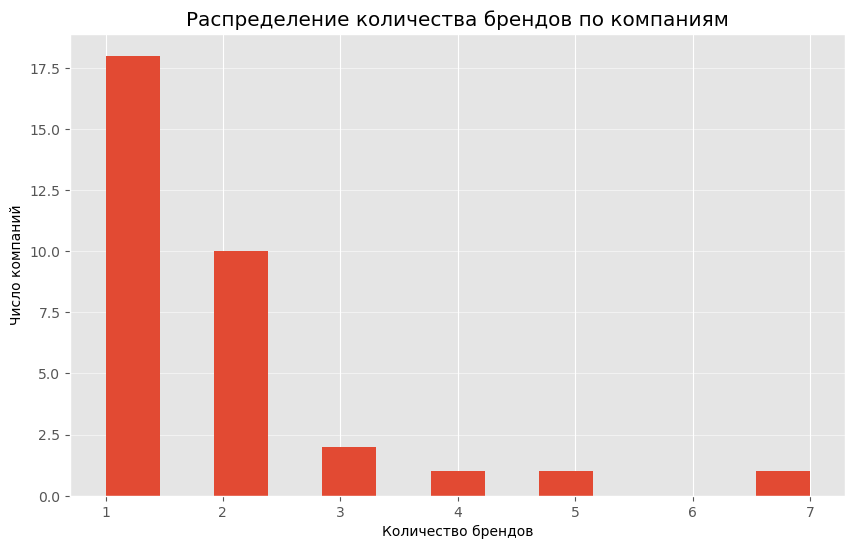

In [119]:
plt.style.use('ggplot')
# cоздаем график
plt.figure(figsize=(10, 6))
plt.hist(brands_per_company['brand'], bins=13)

plt.title('Распределение количества брендов по компаниям')
plt.xlabel('Количество брендов')
plt.ylabel('Число компаний')
plt.grid(axis='y', alpha=0.5)

plt.show()

В основном автоцентры торгуют одним брендом (18 компаний), реже 2 брендами. Посчитаем доли тех, кто торгует 1 брендом, и тех, у кого более одного бренда.

In [120]:
# считаем компании с 1 брендом
single_brand = len(brands_per_company[brands_per_company['brand'] == 1])

# считаем компании с несколькими брендами
multi_brand = len(brands_per_company[brands_per_company['brand'] > 1])

# вычисляем доли
single_brand_share = single_brand / len(brands_per_company)
multi_brand_share = multi_brand / len(brands_per_company)

print(f"Компаний с 1 брендом: {single_brand} ({single_brand_share:.1%})")
print(f"Компаний с несколькими брендами: {multi_brand} ({multi_brand_share:.1%})")

Компаний с 1 брендом: 18 (54.5%)
Компаний с несколькими брендами: 15 (45.5%)


Таким образом компаний, торгующих 1 брендом больше половины - 54.5%.

Аналогично посмотрим распределение моделей по брендам. 

Всего 46 брендов, посмотрим ТОП-10 брендов по количеству продаваемых моделей.

In [121]:
# cоздаем и сортируем таблицу
models_per_company = df.groupby('brand')['model'].nunique().reset_index()
models_per_company.sort_values(by='model', ascending=False, inplace=True)

# выводим ТОП-10
models_per_company.head(10)

,brand,model
18,KAMAZ,24
2,BMW,14
26,Mercedes-Benz,14
42,Volkswagen,13
12,Hyundai Truck & Bus,10
41,UAZ,10
9,GAZ,9
19,Kia,9
16,Jac,9
1,Audi,9


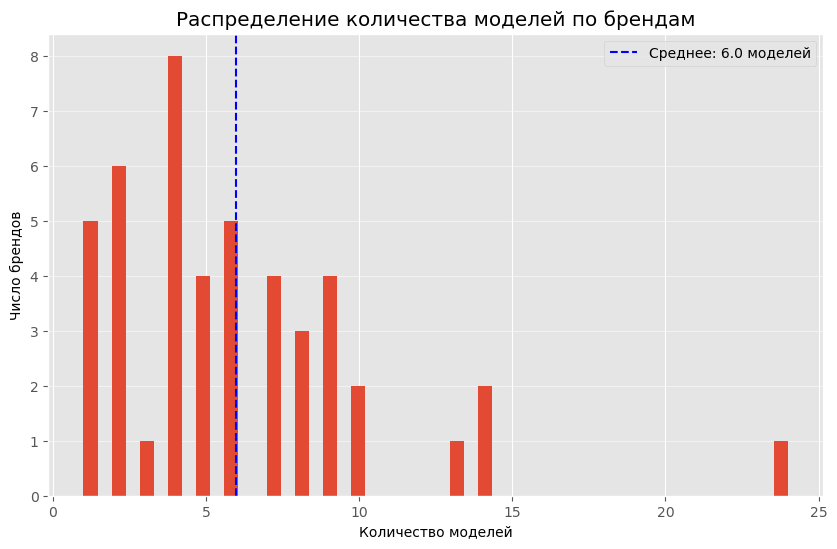

In [122]:
# cоздаем график
plt.figure(figsize=(10, 6))
plt.hist(models_per_company['model'], bins=50)

plt.title('Распределение количества моделей по брендам')
plt.xlabel('Количество моделей')
plt.ylabel('Число брендов')
plt.grid(axis='y', alpha=0.5)

# добавляем среднюю линию
mean_val = models_per_company['model'].mean()
plt.axvline(mean_val, color='blue', linestyle='--', 
            label=f'Среднее: {mean_val:.1f} моделей')
plt.legend()

plt.show()

Среднее количество моделей на бренд - 6 штук. Наиболее частое количество моделей на бренд - 4 штуки (у 8 брендов). По одной моделе у 5 компаний. Лидер по количеству моделей - KAMAZ (24 модели). Так же довольно широкий модельный ряд у брендов BMW, Mercedes-Benz и Volkswagen (13-14 моделей).

**year_of_release**

Посмотрим автомобилями какого года выпуска преимущественно торгуют.

In [123]:
# сводная таблица
release_year_ratio = df.groupby('year_of_release')['quantity'].sum().reset_index()
release_year_ratio.columns = ['year', 'count']
release_year_ratio['ratio'] = round(release_year_ratio['count']/release_year_ratio['count'].sum(), 5)
release_year_ratio = release_year_ratio.sort_values(by='ratio', ascending=False)
release_year_ratio

,year,count,ratio
6,2019,41550,0.78823
5,2018,10789,0.20467
4,2017,340,0.00645
3,2016,30,0.00057
2,2014,2,0.00004
0,2011,1,0.00002
1,2013,1,0.00002


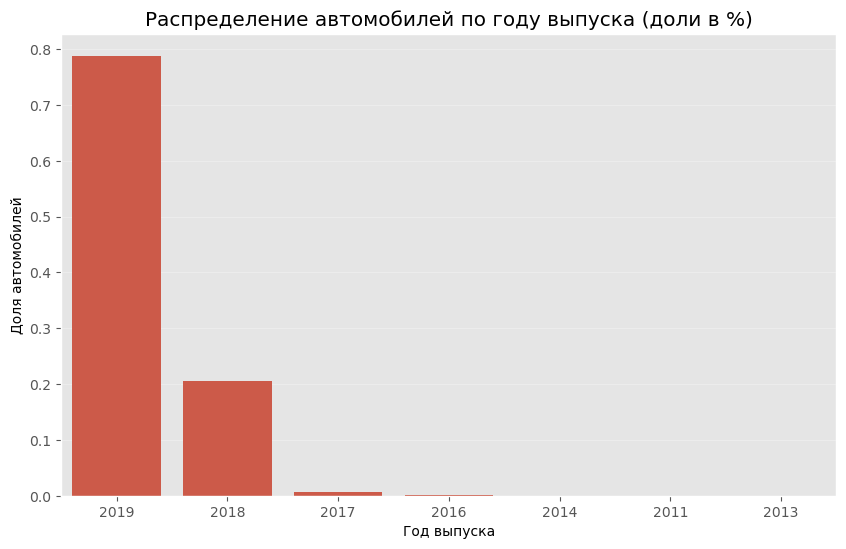

In [124]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='year', y='ratio', data=release_year_ratio)
plt.title('Распределение автомобилей по году выпуска (доли в %)')
plt.xlabel('Год выпуска')
plt.ylabel('Доля автомобилей')
plt.grid(axis='y', alpha=0.3)
plt.show()

78% проданных автомобилей 2019 года выпуска. Около 20% - автомобили 2018 года. Есть еще автомобили 2017, 2016, 2014, 2013 и 2011 года выпуска, но их доля составила менее 1%.

**country_of_origin**

Проанализируем распределение по странам производства. Найдем ТОП-10.

In [125]:
# сводная таблица
country_of_origin_ratio = df.groupby('country_of_origin')['quantity'].sum().reset_index()
country_of_origin_ratio.columns = ['country_of_origin', 'count']
country_of_origin_ratio['ratio'] = round(country_of_origin_ratio['count']/country_of_origin_ratio['count'].sum(), 3)
country_of_origin_ratio = country_of_origin_ratio.sort_values(by='ratio', ascending=False).head(10)
country_of_origin_ratio

,country_of_origin,count,ratio
9,KAZ,31366,0.582
13,RUS,14341,0.266
8,JPN,4612,0.086
16,TUR,1167,0.022
15,THA,981,0.018
17,USA,507,0.009
4,DEU,357,0.007
6,GBR,206,0.004
18,UZB,83,0.002
3,CHN,94,0.002


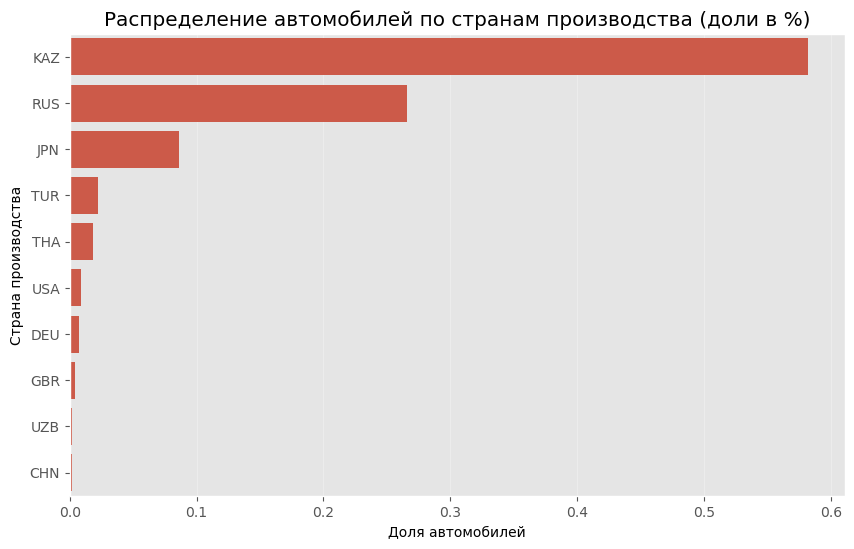

In [126]:
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='country_of_origin', data=country_of_origin_ratio)
plt.title('Распределение автомобилей по странам производства (доли в %)')
plt.xlabel('Доля автомобилей')
plt.ylabel('Страна производства')
plt.grid(axis='x', alpha=0.3)
plt.show()

Большая часть проданных автомобилей (58%) произведена в Казахстане. На втором месте страна производства - РФ (26%), на третьем - Япония (8%).

**type_of_fuel**

Рассмотрим распределение автомобилей по типу топлива.

In [127]:
# сводная таблица
type_of_fuel_ratio = df.groupby('type_of_fuel')['quantity'].sum().reset_index()
type_of_fuel_ratio.columns = ['country_of_origin', 'count']
type_of_fuel_ratio['ratio'] = round(type_of_fuel_ratio['count']/type_of_fuel_ratio['count'].sum(), 4)
type_of_fuel_ratio.sort_values(by='ratio', ascending=False)

,country_of_origin,count,ratio
2,F,50124,0.9545
0,D,2365,0.045
1,E,14,0.0003
3,HYB,10,0.0002


95% проданных автомобилей с бензиновым двигателем, 4% - дизельный двигатель. Менее 1% - электро и гибрид.

**engine_size**

Посмотрим какой литраж двигателя наиболее часто встречается. Для этого построим боксплот.

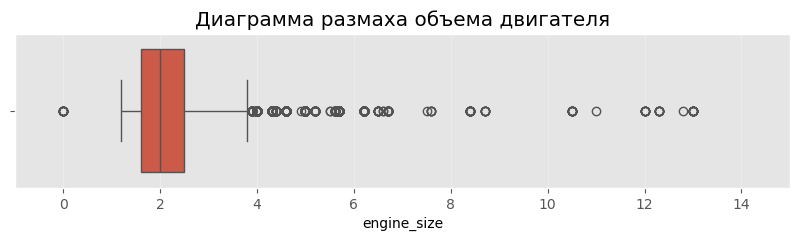

In [128]:
# cтроим boxplot
plt.figure(figsize=(10, 2)) 

sns.boxplot(x=df['engine_size'], orient='h')

plt.title('Диаграмма размаха объема двигателя')
plt.xlim(-1, 15)  
plt.grid(axis='x', alpha=0.3)

plt.show()

Наиболее часто встречающиеся значения находятся в диапозоне от 1.6 до 3.8 литров. 

**transmission_box**

Автомобили с какой коробкой передач встречаются чаще?

In [129]:
# сводная таблица
transmission_box_ratio = df.groupby('transmission_box')['quantity'].sum().reset_index()
transmission_box_ratio.columns = ['transmission_box', 'count']
transmission_box_ratio['ratio'] = round(transmission_box_ratio['count']/transmission_box_ratio['count'].sum(), 2)
transmission_box_ratio.sort_values(by='ratio', ascending=False)

,transmission_box,count,ratio
0,AT,46247,0.89
1,MT,5966,0.11


Доля автомобилей с автоматической коробкой передач составляет 65%. С механической коробкой - 35%.

**type_of_drive**

Посмотрим распределение автомобилей по типу привода.

In [130]:
# сводная таблица
type_of_drive_ratio = df.groupby('type_of_drive')['quantity'].sum().reset_index()
type_of_drive_ratio.columns = ['type_of_drive', 'count']
type_of_drive_ratio['ratio'] = round(type_of_drive_ratio['count']/type_of_drive_ratio['count'].sum(), 2)
type_of_drive_ratio = type_of_drive_ratio.sort_values(by='ratio', ascending=False)
type_of_drive_ratio

,type_of_drive,count,ratio
1,4WD,19709,0.38
2,FWD,18904,0.37
0,2WD,11216,0.22
3,RWD,1699,0.03


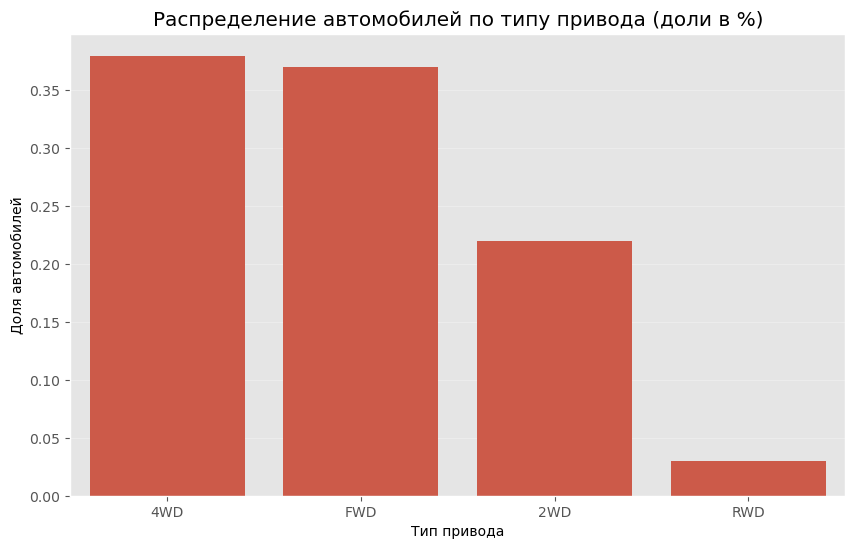

In [131]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='type_of_drive', y='ratio', data=type_of_drive_ratio)
plt.title('Распределение автомобилей по типу привода (доли в %)')
plt.xlabel('Тип привода')
plt.ylabel('Доля автомобилей')
plt.grid(axis='y', alpha=0.3)
plt.show()

Полный и передний привод встречается чаще (38% и 37% соответственно). Задний привод наименее частый тип - 3%.

**region**

Посмотрим ТОП-10 регионов с наибольшим количеством продаж.

In [132]:
# сводная таблица
region_ratio = df.groupby('region')['quantity'].sum().reset_index()
region_ratio.columns = ['region', 'count']
region_ratio['ratio'] = round(region_ratio['count']/region_ratio['count'].sum(), 5)
region_ratio = region_ratio.sort_values(by='ratio', ascending=False)
region_ratio.head(10)

,region,count,ratio
2,Алматы,13947,0.25888
11,Нур-Султан,10158,0.18855
23,Шымкент,3749,0.06959
3,Атырау,3393,0.06298
8,Костанай,3258,0.06047
5,Караганда,2983,0.05537
21,Уральск,2180,0.04046
22,Усть-Каменогорск,2097,0.03892
0,Актау,2049,0.03803
24,ЭКСПОРТ,1919,0.03562


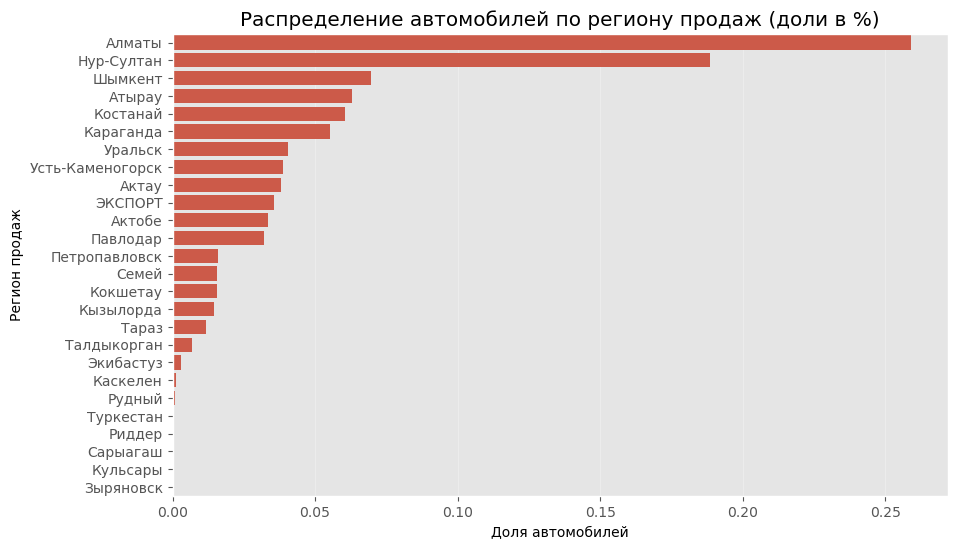

In [133]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='region', data=region_ratio)
plt.title('Распределение автомобилей по региону продаж (доли в %)')
plt.xlabel('Доля автомобилей')
plt.ylabel('Регион продаж')
plt.grid(axis='x', alpha=0.3)
plt.show()

На Алматы приходится 25% продаж, на Нур-Султан - 18%. У остальных регионов доля продаж составляет менее 7%.

**client_type**

Посмотрим на распределение по типу клиента. Было много пропущенных значений в этом столбце. Так что заполним пропуски значением "Не определен".

In [134]:
# заполняем пропуски
df['client_type'] = df['client_type'].fillna('Не определен')

# сводная таблица
client_type_ratio = df.groupby('client_type')['quantity'].sum().reset_index()
client_type_ratio.columns = ['client_type', 'count']
client_type_ratio['ratio'] = round(client_type_ratio['count']/client_type_ratio['count'].sum(), 2)
client_type_ratio.sort_values(by='ratio', ascending=False)

,client_type,count,ratio
1,физ.лицо,24742,0.46
0,Не определен,20613,0.38
2,юр.лицо,8520,0.16


Пропуски составляют 38%. Физические лица - 46%. Юридические лица - 16%.

**quantity**

Количество автомобилей в одной покупке. Посмотрим медиану, какому значению соответствует 95-ому перцентилю и максимальное значение.

In [135]:
print(f"Медиана: {df['quantity'].median()}")
print(f"95-й перцентиль: {df['quantity'].quantile(0.95)}")
print(f"Максимальное значение: {df['quantity'].max()}")

Медиана: 1.0
95-й перцентиль: 2.0
Максимальное значение: 115


В основном в одной покупке - 1 автомобиль. Построим график распределения по количеству автомобилей в одной покупке. Количество автомобилей от 1 до 5.

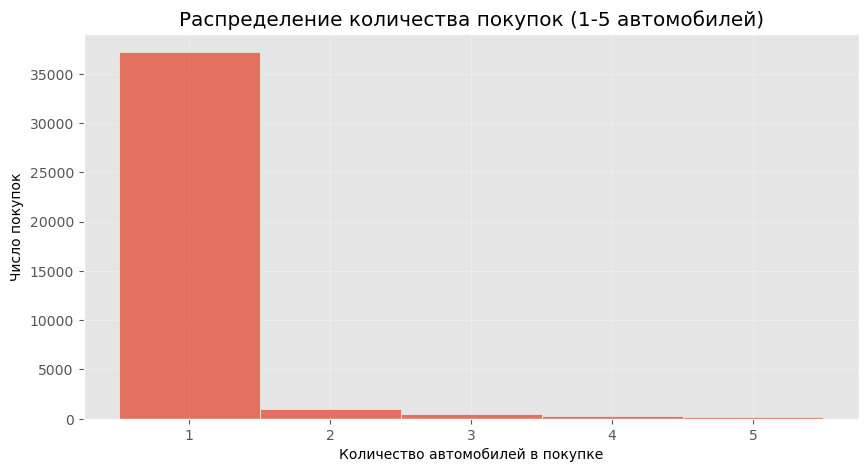

In [136]:
plt.figure(figsize=(10, 5))
sns.histplot(df['quantity'], discrete=True, bins=5, binrange=(1, 5))
plt.title('Распределение количества покупок (1-5 автомобилей)')
plt.xlabel('Количество автомобилей в покупке')
plt.ylabel('Число покупок')
plt.grid(alpha=0.3)

plt.show()

Количество покупок с 1 автомобилем составляет более 35000 шт.

**price**

Построим диаграмму размаха значений для цены.

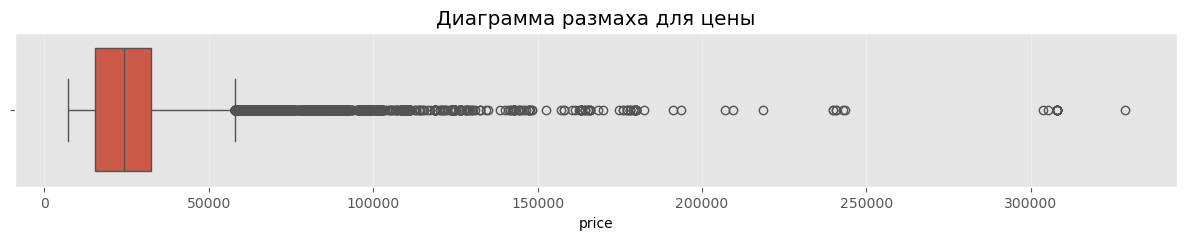

In [137]:
# cтроим boxplot
plt.figure(figsize=(15, 2)) 

boxplot = sns.boxplot(x=df['price'], orient='h')

plt.title('Диаграмма размаха для цены')
plt.grid(axis='x', alpha=0.3)

plt.show()

In [138]:
lines = boxplot.get_lines()
whisker_low = lines[0].get_xdata()[1]  # левый ус (нижний квантиль)
whisker_high = lines[1].get_xdata()[1]  # правый ус (верхний квантиль)

print(f"Усы boxplot: [{whisker_low:.2f}, {whisker_high:.2f}]")

Усы boxplot: [7100.00, 57940.10]


Разброс цен большой. Нормальные значения находятся в диапозоне от 7100 до 57940 USD. Максимальное значение более 300000 USD. Отфильтруем датафрейм, оставим только те строки, где цена находится в диапозоне нормальных значений, и посмотрим распределение значений.

In [139]:
# фильтруем датафрейм
filtered_data = df[(df['price'] >= 7100) & (df['price'] <= 57940)]

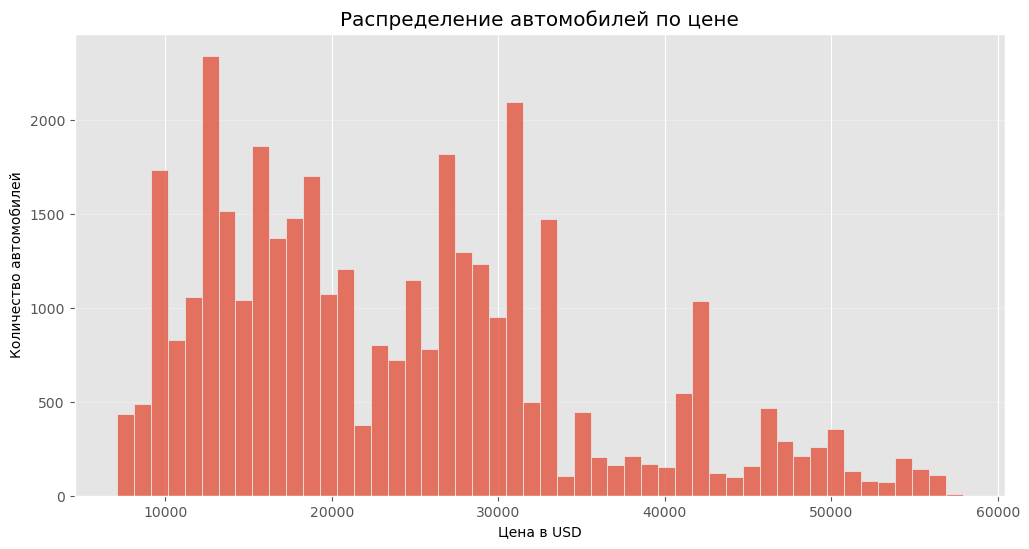

In [140]:
# строим график
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['price'], bins=50)
plt.title('Распределение автомобилей по цене')
plt.xlabel('Цена в USD')
plt.ylabel('Количество автомобилей')
plt.grid(axis='y', alpha=0.3)
plt.show()

Наиболее часто встречающиеся значения от 10000 до 33000 USD.

**sale_price**

Аналогично построим диаграмму размаха для стоимости покупки.

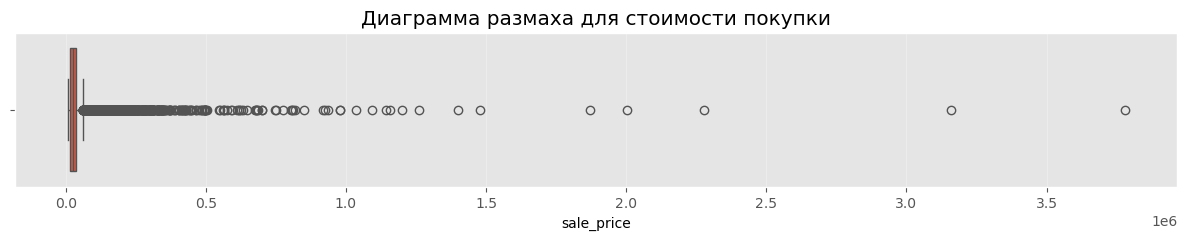

In [141]:
# cтроим boxplot
plt.figure(figsize=(15, 2)) 

boxplot = sns.boxplot(x=df['sale_price'], orient='h')

plt.title('Диаграмма размаха для стоимости покупки')
plt.grid(axis='x', alpha=0.3)

#plt.tight_layout()
plt.show()

In [142]:
lines = boxplot.get_lines()
whisker_low = lines[0].get_xdata()[1]  # левый ус (нижний квантиль)
whisker_high = lines[1].get_xdata()[1]  # правый ус (верхний квантиль)

print(f"Усы boxplot: [{whisker_low:.2f}, {whisker_high:.2f}]")

Усы boxplot: [7100.00, 62535.30]


Наиболее часто встречающиеся значения от 7100 до 62535 USD.

**area**

Рассмотрим области продаж.

In [143]:
# сводная таблица
area_ratio = df.groupby('area')['quantity'].sum().reset_index()
area_ratio.columns = ['area', 'count']
area_ratio['ratio'] = round(area_ratio['count']/area_ratio['count'].sum(), 4)
area_ratio = area_ratio.sort_values(by='ratio', ascending=False)
area_ratio

,area,count,ratio
16,г.Алматы,13947,0.2589
17,г.Нур-Султан,10158,0.1885
15,Южно-Казахстанская область,3749,0.0696
3,Атырауская область,3395,0.063
8,Костанайская область,3305,0.0613
7,Карагандинская область,2983,0.0554
4,Восточно-Казахстанская область,2944,0.0546
6,Западно-Казахстанская область,2180,0.0405
10,Мангистауская область,2049,0.038
14,Экспорт область,1919,0.0356


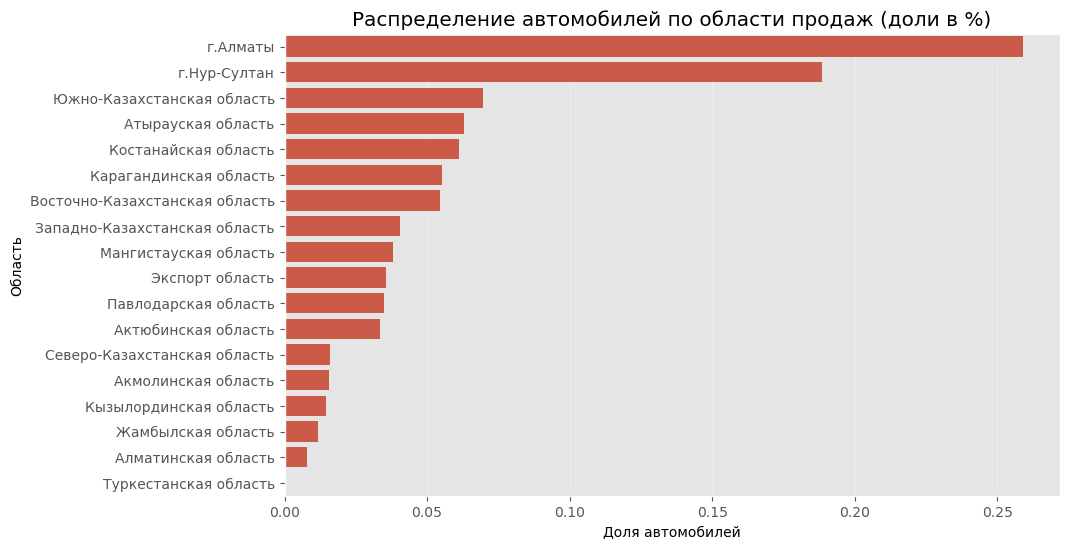

In [144]:
# график
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='area', data=area_ratio)
plt.title('Распределение автомобилей по области продаж (доли в %)')
plt.xlabel('Доля автомобилей')
plt.ylabel('Область')
plt.grid(axis='x', alpha=0.3)
plt.show()

Около 26% продаж приходится на г.Алматы, 18% - на г.Нур-Султан. Распределение значений аналогично распределению в колонке региона.

**segmentation_2013**

Смотрим распределение значений в колонке актуальной сегментации автомобилей.

In [145]:
# сводная таблица
segmentation_2013_ratio = df.groupby('segmentation_2013')['quantity'].sum().reset_index()
segmentation_2013_ratio.columns = ['segmentation_2013', 'count']
segmentation_2013_ratio['ratio'] = round(segmentation_2013_ratio['count']/segmentation_2013_ratio['count'].sum(), 2)
segmentation_2013_ratio = segmentation_2013_ratio.sort_values(by='ratio', ascending=False)
segmentation_2013_ratio

,segmentation_2013,count,ratio
2,Легковые автомобили,23835,0.44
0,Внедорожники,21994,0.41
1,Коммерческие автомобили,5246,0.1
3,Минивэны,1824,0.03
4,Пикапы,976,0.02


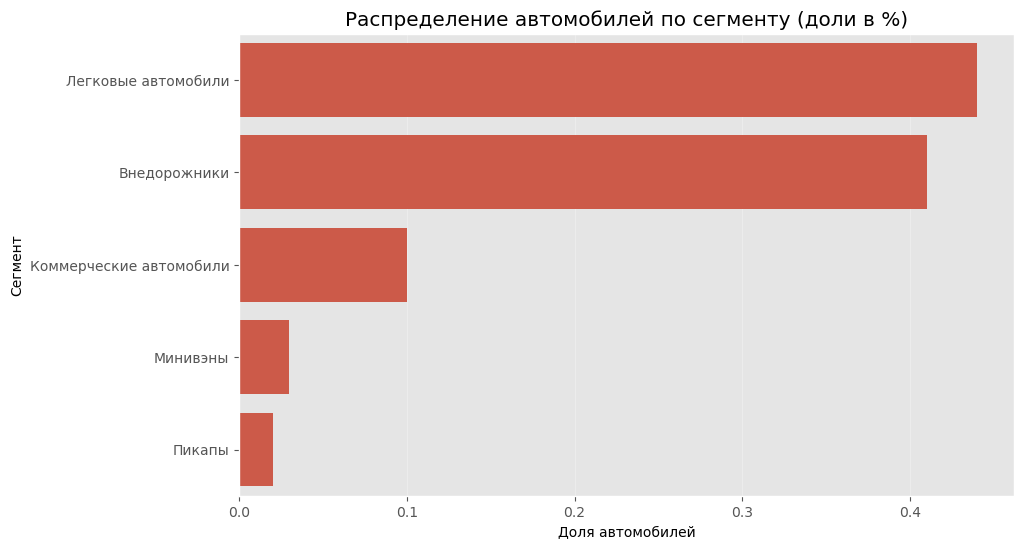

In [146]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='segmentation_2013', data=segmentation_2013_ratio)
plt.title('Распределение автомобилей по сегменту (доли в %)')
plt.xlabel('Доля автомобилей')
plt.ylabel('Сегмент')
plt.grid(axis='x', alpha=0.3)
plt.show()

Легковые автомобили и внедорожники продавались чаще (44% и 41%). 10% приходится на коммерческие автомобили. Менее 5% - минивэны и пикапы.

**class_2013**

Смотрим класс автомобиля.

In [147]:
# сводная таблица
class_2013_ratio = df.groupby('class_2013')['quantity'].sum().reset_index()
class_2013_ratio.columns = ['class_2013', 'count']
class_2013_ratio['ratio'] = round(class_2013_ratio['count']/class_2013_ratio['count'].sum(), 4)
class_2013_ratio = class_2013_ratio.sort_values(by='ratio', ascending=False)
class_2013_ratio

,class_2013,count,ratio
1,B класс,13846,0.257
20,Субкомпактные SUV,7681,0.1426
9,Компактные SUV,7346,0.1364
3,D класс,5566,0.1033
17,Среднеразмерные SUV,4401,0.0817
2,C класс,4034,0.0749
13,Полноразмерные SUV,2566,0.0476
11,Малотоннажные грузовики,2073,0.0385
8,Компактвэн,1774,0.0329
10,Крупнотоннажные грузовики,1245,0.0231


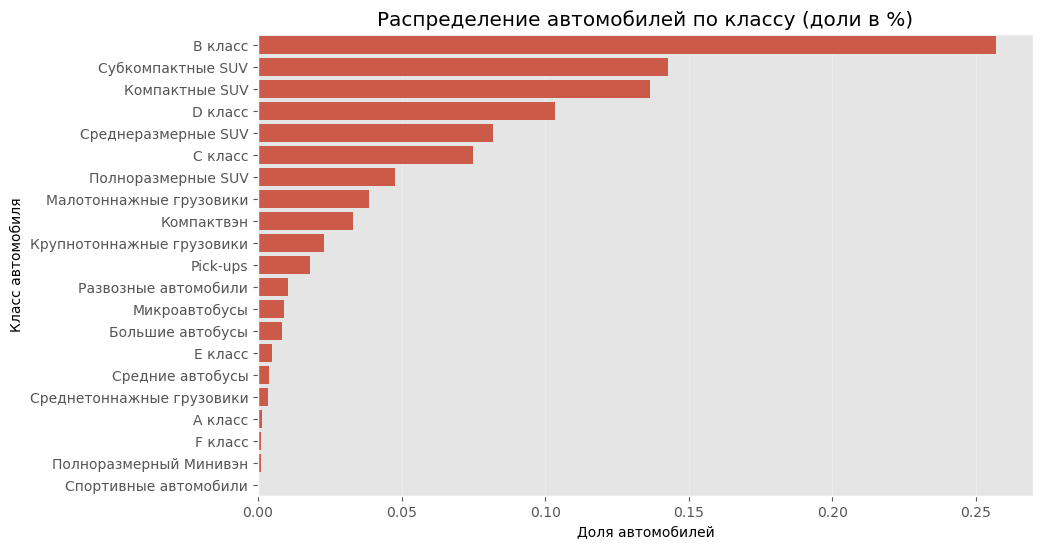

In [148]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='class_2013', data=class_2013_ratio)
plt.title('Распределение автомобилей по классу (доли в %)')
plt.xlabel('Доля автомобилей')
plt.ylabel('Класс автомобиля')
plt.grid(axis='x', alpha=0.3)
plt.show()

Наибольшая часть проданных автомобилей принадлежит B классу (около 25%). Субкомпактные SUV и Компактные SUV составляют 14% и 13% соответственно. Спортивные автомобили составляют наименьшую часть (всего лишь 10 автомобилей).

## 3. Анализ авторынка Казахстана.

Проанализируем авторынок Казахстана. Для начала посмотрим сколько всего было продано машин за весь период и какой была выручка.

In [149]:
# общее количество проданных автомобилей
total_quantity = df['quantity'].sum()

# общая выручка
total_revenue = df['sale_price'].sum()

print(f"Общее количество проданных автомобилей: {total_quantity}")
print(f"Общая выручка: {total_revenue:.2f} USD")

Общее количество проданных автомобилей: 53875
Общая выручка: 1349194556.31 USD


Рассмотрим помесячно количество проданных авто, выручку и средний чек.

In [150]:
# убираем научную нотацию
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# создаем сводную таблицу по месяцу продажи
monthly_stats = df.groupby('date_of_sale').agg({'quantity':'sum', 'sale_price':'sum'})
monthly_stats.columns = ['total_quantity','total_revenue']
monthly_stats['mean_cheaсk'] = monthly_stats['total_revenue']/monthly_stats['total_quantity']
monthly_stats

,total_quantity,total_revenue,mean_cheaсk
date_of_sale,,,
2019-01-31,4517,113868002.45,25208.77
2019-02-28,4493,110346686.45,24559.69
2019-03-31,5055,128066970.34,25334.71
2019-04-30,5868,146099542.20,24897.67
2019-05-31,6438,164125511.85,25493.25
2019-06-30,6459,162764053.86,25199.57
2019-07-31,7778,203179856.27,26122.38
2019-08-31,6626,158222439.73,23879.03
2019-09-30,6641,162521493.16,24472.44


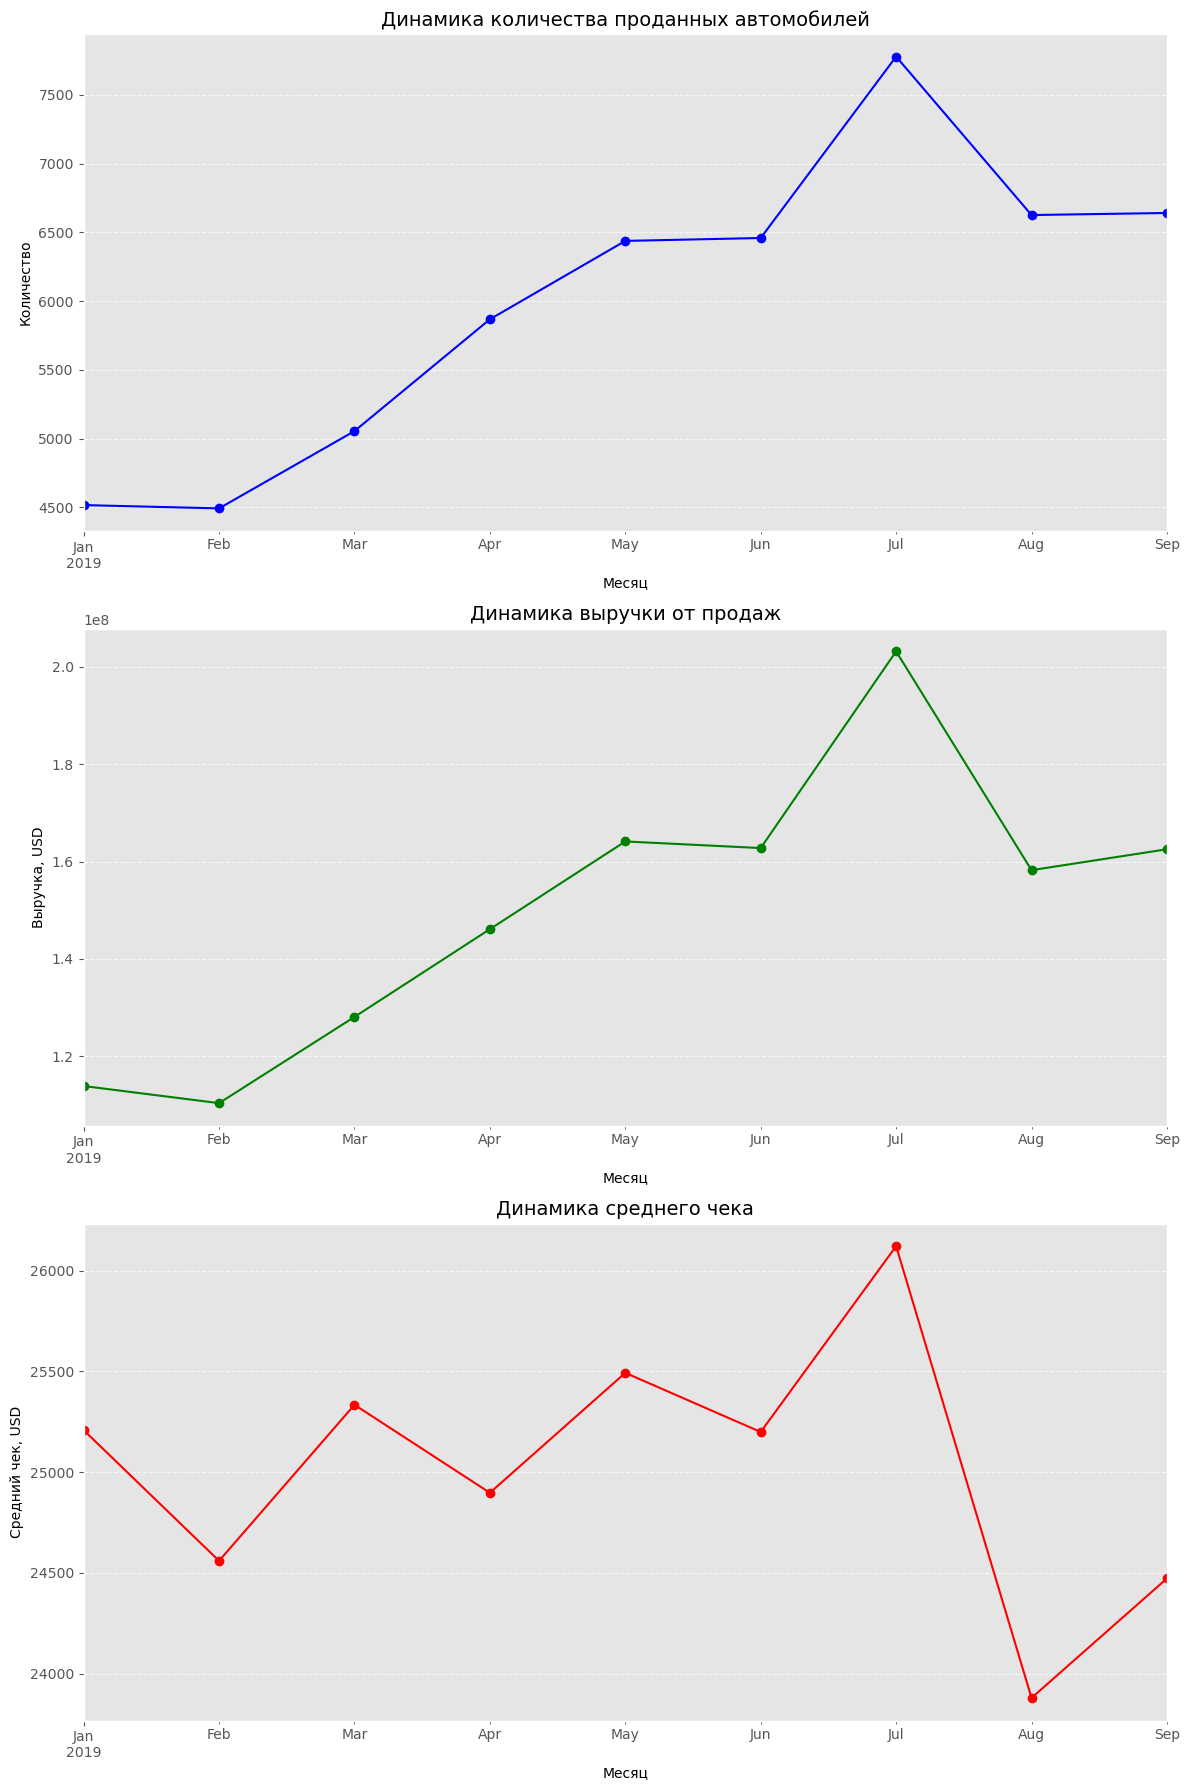

In [151]:
# строим графики
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# график количества
monthly_stats.plot(kind='line', ax=axes[0],
                   marker='o', y='total_quantity',
                   legend=False, color='blue')
axes[0].set_title('Динамика количества проданных автомобилей', fontsize=14)
axes[0].set_ylabel('Количество')

# график выручки
monthly_stats.plot(kind='line', ax=axes[1],
                   marker='o', y='total_revenue',
                   legend=False, color='green')
axes[1].set_title('Динамика выручки от продаж', fontsize=14)
axes[1].set_ylabel('Выручка, USD')

# график среднего чека
monthly_stats.plot(kind='line', ax=axes[2],
                   marker='o', y='mean_cheaсk',
                   legend=False, color='red')
axes[2].set_title('Динамика среднего чека', fontsize=14)
axes[2].set_ylabel('Средний чек, USD')


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Месяц')

plt.tight_layout()
plt.show()

И количество проданных автомобилей и выручка от продаж и средний чек имеют наибольшие показатели в июле 2019 года. Количество и выручка имеют схожую динамику - начало роста в феврале, пик в июле, затем спад. Средний чек является более колеблющимся показателем, при этом стоит отметить, что наиболее низкий средний чек был в августе 2019 года.

Подробнее изучим автоцентры. Найдем ТОП автоцентров по выручке.

In [152]:
# создаем сводную таблицу ТОП-15 автоцентров
company_stats = df.groupby('company').agg({'quantity':'sum', 'sale_price':'sum'})
company_stats.columns = ['total_quantity','total_revenue']
company_stats = company_stats.sort_values(by='total_revenue', ascending=False).head(15).reset_index()
company_stats

,company,total_quantity,total_revenue
0,Toyota Motor Kazakhstan,11951,479876439.43
1,Astana Motors,10169,229338604.06
2,БИПЭК АВТО,15132,186017769.70
3,Allur Auto,2636,66512281.58
4,Nissan Manufacturing RUS,1760,46289495.68
5,ТК КАМАЗ,893,46215934.55
6,Вираж,2909,46124756.28
7,Автоцентр-Бавария,454,29219721.33
8,Renault Россия,1796,24184906.23
9,Mercur Auto,650,19355275.98


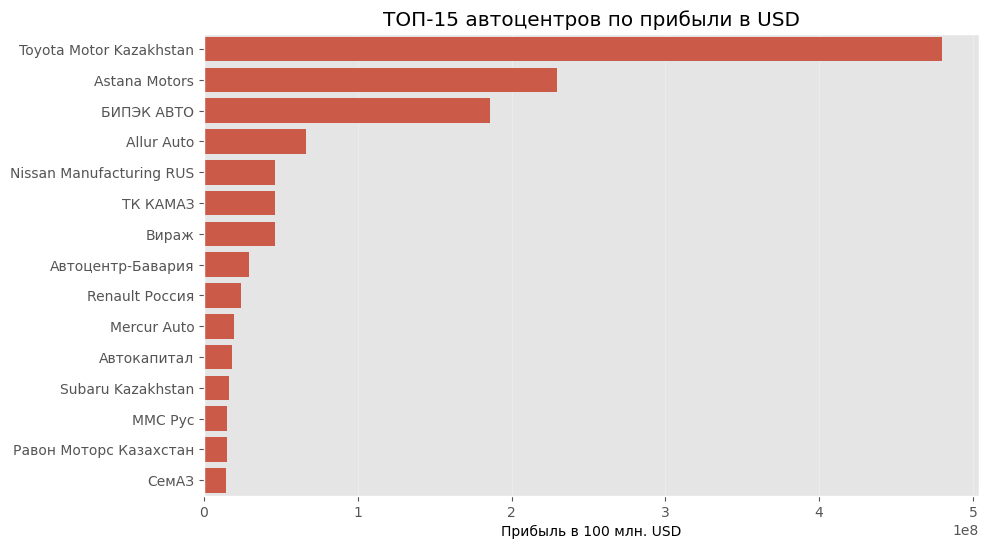

In [153]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='total_revenue', y='company', data=company_stats)
plt.title('ТОП-15 автоцентров по прибыли в USD')
plt.xlabel('Прибыль в 100 млн. USD')
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.show()

Самая большая выручка (479 млн. USD) у Toyota Motor Kazakhstan, далее идет Astana Motors - около 229 млн. USD, и БИПЭК АВТО - 186 млн. USD. 

Посмотрим самые популярные модели.

In [154]:
# сводная таблица
model_stats = df.groupby('model').agg({
    'brand': 'first', 
    'quantity': 'sum',
    'sale_price': 'sum'
})

model_stats = model_stats.sort_values(by='quantity', ascending=False).head(10).reset_index()
model_stats

,model,brand,quantity,sale_price
0,camry,Toyota,4853,155748735.08
1,granta,Lada,3664,26671905.26
2,tucson,Hyundai,3271,87315649.16
3,vesta,Lada,2653,31116273.68
4,4x4,Lada,2469,22338600.00
5,accent,Hyundai,2211,36481914.44
6,elantra,Hyundai,2062,41269145.64
7,creta,Hyundai,1775,35222266.67
8,lc prado,Toyota,1711,83134112.05
9,nexia r3,Ravon,1700,16714967.50


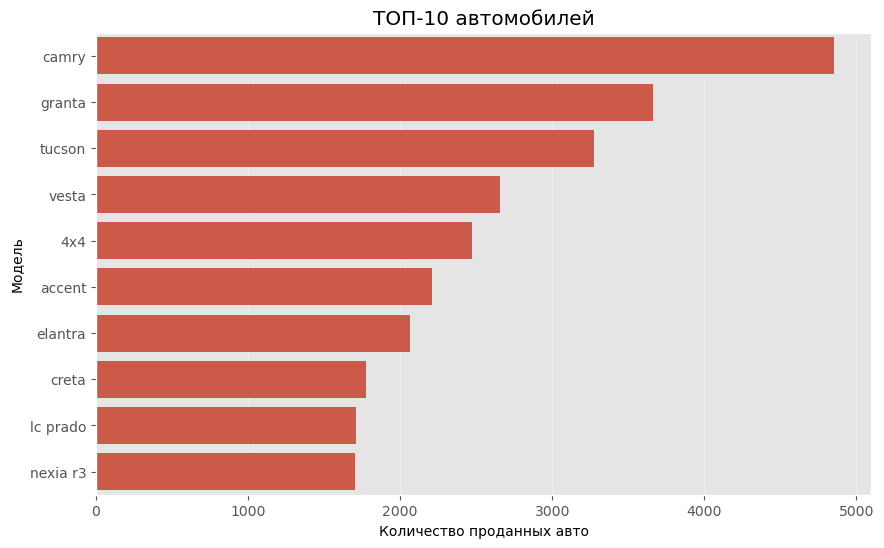

In [155]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='quantity', y='model', data=model_stats)
plt.title('ТОП-10 автомобилей')
plt.xlabel('Количество проданных авто')
plt.ylabel('Модель')
plt.grid(axis='x', alpha=0.3)
plt.show()

Самая популярная модель - Toyota Camry (4853 проданных авто), далее - Lada Granta (3664 авто) и Hyundai Tucson (3271 авто).

Посмотрим самые большие заказы (количество автомобилей в одной покупке больше 30).

In [156]:
large_quantity = df.loc[df['quantity'] > 30]
len(large_quantity)

41

Всего таких заказов 41. Посмотрим уникальные модели автомобилей, которые входят в такие заказы.

In [157]:
unique_pairs = large_quantity[['brand', 'model']].drop_duplicates().sort_values(['brand', 'model']).reset_index(drop=True)
unique_pairs

,brand,model
0,Daewoo,bc 095
1,Jac,s3
2,Kia,cerato
3,Kia,rio
4,Lada,4x4
5,Lada,granta
6,Lada,largus
7,Lada,vesta
8,Skoda,octavia
9,Volkswagen,polo


Всего 10 таких моделей.

Посмотрим прибыль по сегментам автомобилей.

In [158]:
# создаем сводную таблицу
segmentation_stats = df.groupby('segmentation_2013').agg({'quantity':'sum', 'sale_price':'sum'})
segmentation_stats.columns = ['total_quantity','total_revenue']
segmentation_stats = segmentation_stats.sort_values(by='total_revenue', ascending=False).reset_index()
segmentation_stats

,segmentation_2013,total_quantity,total_revenue
0,Внедорожники,21994,663991129.53
1,Легковые автомобили,23835,447605225.10
2,Коммерческие автомобили,5246,185811934.25
3,Пикапы,976,29021641.16
4,Минивэны,1824,22764626.27


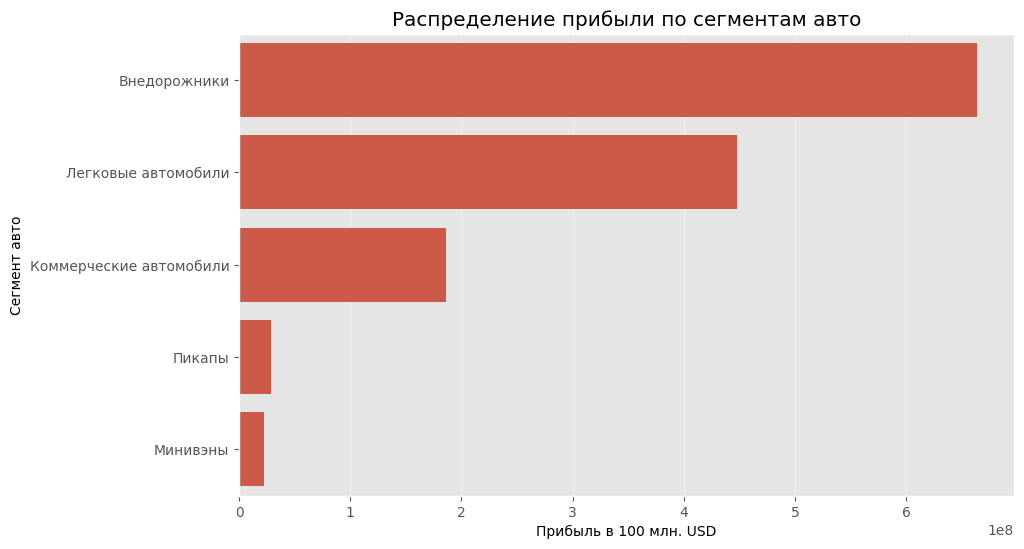

In [159]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='total_revenue', y='segmentation_2013', data=segmentation_stats)
plt.title('Распределение прибыли по сегментам авто')
plt.xlabel('Прибыль в 100 млн. USD')
plt.ylabel('Сегмент авто')
plt.grid(axis='x', alpha=0.3)
plt.show()

Наибольшую прибыль принесли внедорожники - 663991129 USD. Далее идут легковые автомобили - 447605225 USD. Коммерческие автомобили - 185811934 USD. Пикапы и минивэны - 29021641 и 22764626 USD соответственно.

Построим график зависимости цены от сегмента автомобиля.

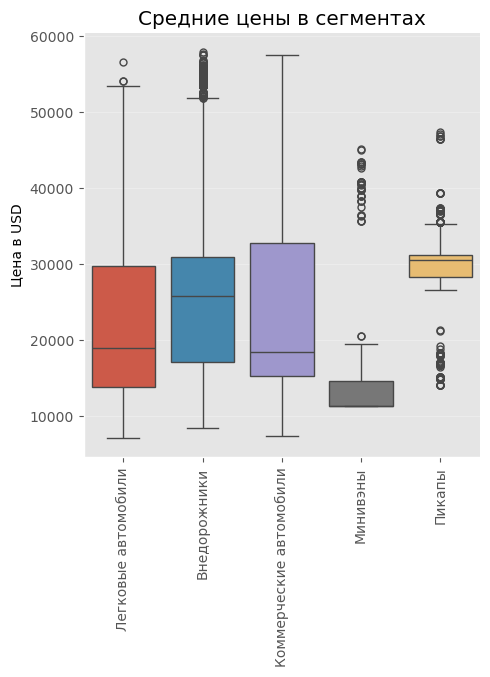

In [160]:
# строим график
sns.catplot(x='segmentation_2013',
            y='price',
            hue='segmentation_2013', 
            kind='box',
            data=filtered_data)

plt.title('Средние цены в сегментах')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Цена в USD')
plt.grid(axis='y', alpha=0.3)  

plt.show()

Самая высокая медианная цена у пикапов, далее идут внедорожники, наименьшая у минивэнов.

Посмотрим самые популярные модели авто для каждого из сегментов.

In [161]:
most_popular = (
    df.groupby(['segmentation_2013', 'brand', 'model'])
      .size() 
      .reset_index(name='count')  
      .sort_values('count', ascending=False)  
      .drop_duplicates('segmentation_2013')
)

most_popular

,segmentation_2013,brand,model,count
255,Легковые автомобили,Toyota,camry,4853
19,Внедорожники,Hyundai,tucson,3271
107,Коммерческие автомобили,GAZ,3302,998
272,Пикапы,Toyota,hilux dc,827
262,Минивэны,Lada,largus,266


Самая часто покупаемая модель среди легковых автомобилей - Toyota camry, среди внедорожников - Hyundai tucson, среди коммерческих автомобилей - GAZ 3302, среди пикапов - Toyota hilux dc, среди минивэнов - Lada largus.

Построим график по динамике продаж каждого из сегментов.

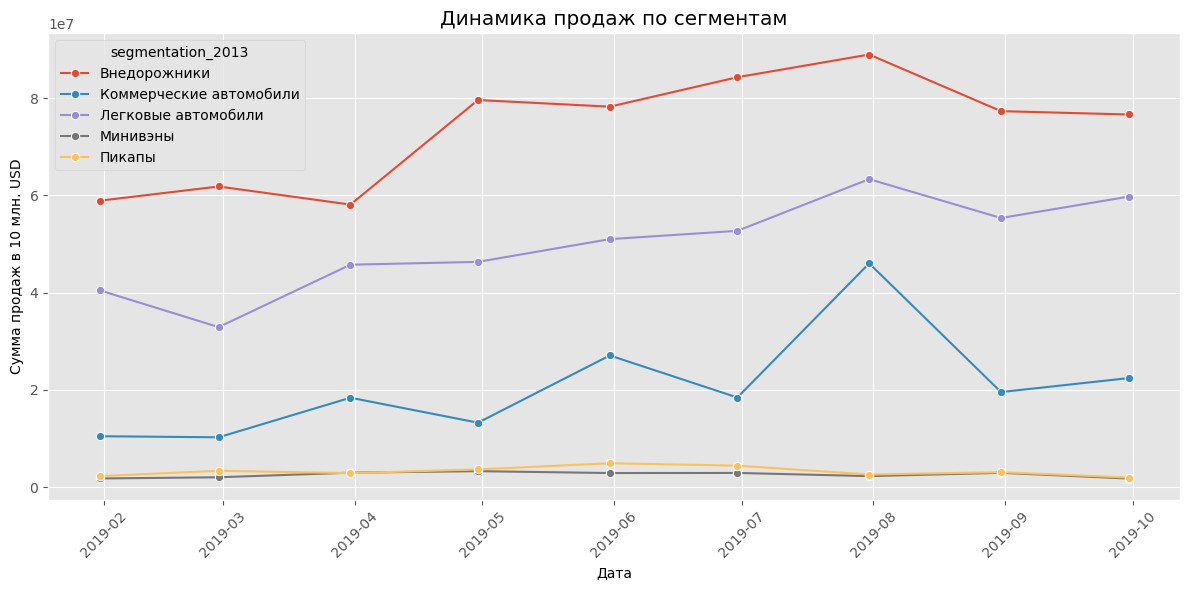

In [162]:
# создаем сводную таблицу
monthly_stats = df.groupby(['date_of_sale', 'segmentation_2013']).agg({'quantity':'sum', 'sale_price':'sum'})

# строим график
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_stats,
    x='date_of_sale',
    y='sale_price',
    hue='segmentation_2013',
    marker='o'
)
plt.title('Динамика продаж по сегментам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж в 10 млн. USD')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Для минивэнов и пикапов уровень продаж находится примерно на одном уровне вне зависимости от месяца. Внедорожники, коммерческие автомобили и легковые автомобили имеют общую тенденцию - постепенный рост, пик в июле и затем постепенный спад.

Проанализируем как распределяется прибыль по регионам.

In [163]:
# создаем сводную таблицу ТОП-15 
region_stats = df.groupby('region').agg({'quantity':'sum', 'sale_price':'sum'})
region_stats.columns = ['total_quantity','total_revenue']
region_stats['mean'] = region_stats['total_revenue']/region_stats['total_quantity']
region_stats = region_stats.sort_values(by='total_revenue', ascending=False).head(15).reset_index()
region_stats

,region,total_quantity,total_revenue,mean
0,Алматы,13947,426474005.34,30578.19
1,Нур-Султан,10158,292675683.31,28812.33
2,Костанай,3258,87841643.75,26961.83
3,Шымкент,3749,81816963.53,21823.68
4,Атырау,3393,74602413.27,21987.15
5,Караганда,2983,59959740.56,20100.48
6,Актау,2049,46727491.50,22805.02
7,Уральск,2180,45829901.28,21022.89
8,Актобе,1809,44215177.52,24441.78
9,Усть-Каменогорск,2097,40729934.76,19422.95


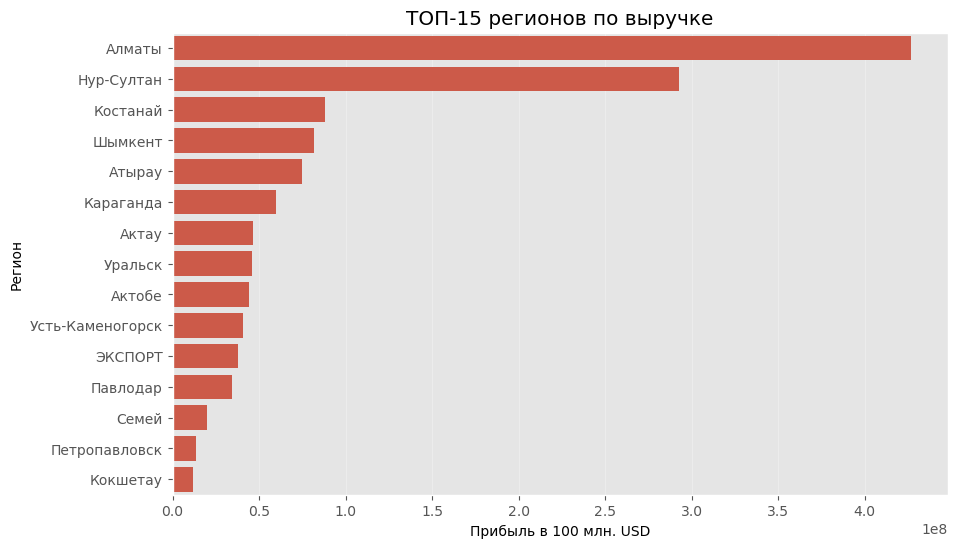

In [164]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='total_revenue', y='region', data=region_stats)
plt.title('ТОП-15 регионов по выручке')
plt.xlabel('Прибыль в 100 млн. USD')
plt.ylabel('Регион')
plt.grid(axis='x', alpha=0.3)
plt.show()

Алматы и Нур-Султан лидируют - 426474005 USD и 292675683 USD соответственно. 

И построим график средней стоимости автомобиля для регионов.

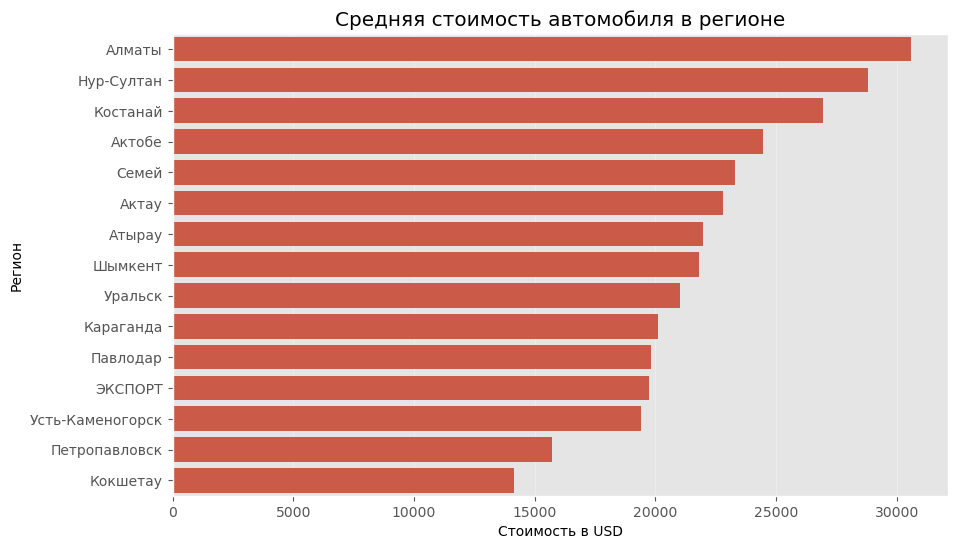

In [165]:
region_stats = region_stats.sort_values(by='mean', ascending=False)
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='mean', y='region', data=region_stats)
plt.title('Средняя стоимость автомобиля в регионе')
plt.xlabel('Стоимость в USD')
plt.ylabel('Регион')
plt.grid(axis='x', alpha=0.3)
plt.show()

Самые высокие средние чеки также в Алматы и Нур-Султане.

## 4. Показатели эффективности Mercur Auto.

In [166]:
# выбираем только строки с Mercur Auto
mercur_auto_df = df.loc[df['company'] == 'Mercur Auto']

Посчитаем выручку Mercur Auto и количество проданных автомобилей.

In [167]:
# общее количество проданных автомобилей
total_quantity = mercur_auto_df['quantity'].sum()

# общая выручка
total_revenue = mercur_auto_df['sale_price'].sum()

print(f"Общее количество проданных автомобилей: {total_quantity}")
print(f"Общая выручка: {total_revenue:.2f} USD")

Общее количество проданных автомобилей: 650
Общая выручка: 19355275.98 USD


Посмотрим динамику продаж по месяцам.

In [168]:
# создаем сводную таблицу по месяцу продажи
monthly_stats = mercur_auto_df.groupby('date_of_sale').agg({'quantity':'sum', 'sale_price':'sum'})
monthly_stats.columns = ['total_quantity','total_revenue']
monthly_stats['mean_cheaсk'] = monthly_stats['total_revenue']/monthly_stats['total_quantity']
monthly_stats

,total_quantity,total_revenue,mean_cheaсk
date_of_sale,,,
2019-01-31,165,2979406.65,18057.01
2019-02-28,126,2949383.66,23407.81
2019-03-31,78,2707627.00,34713.17
2019-04-30,78,2667282.58,34195.93
2019-05-31,153,3687779.06,24103.13
2019-06-30,9,835751.00,92861.22
2019-07-31,17,1386826.00,81578.00
2019-08-31,14,1110374.04,79312.43
2019-09-30,10,1030846.00,103084.60


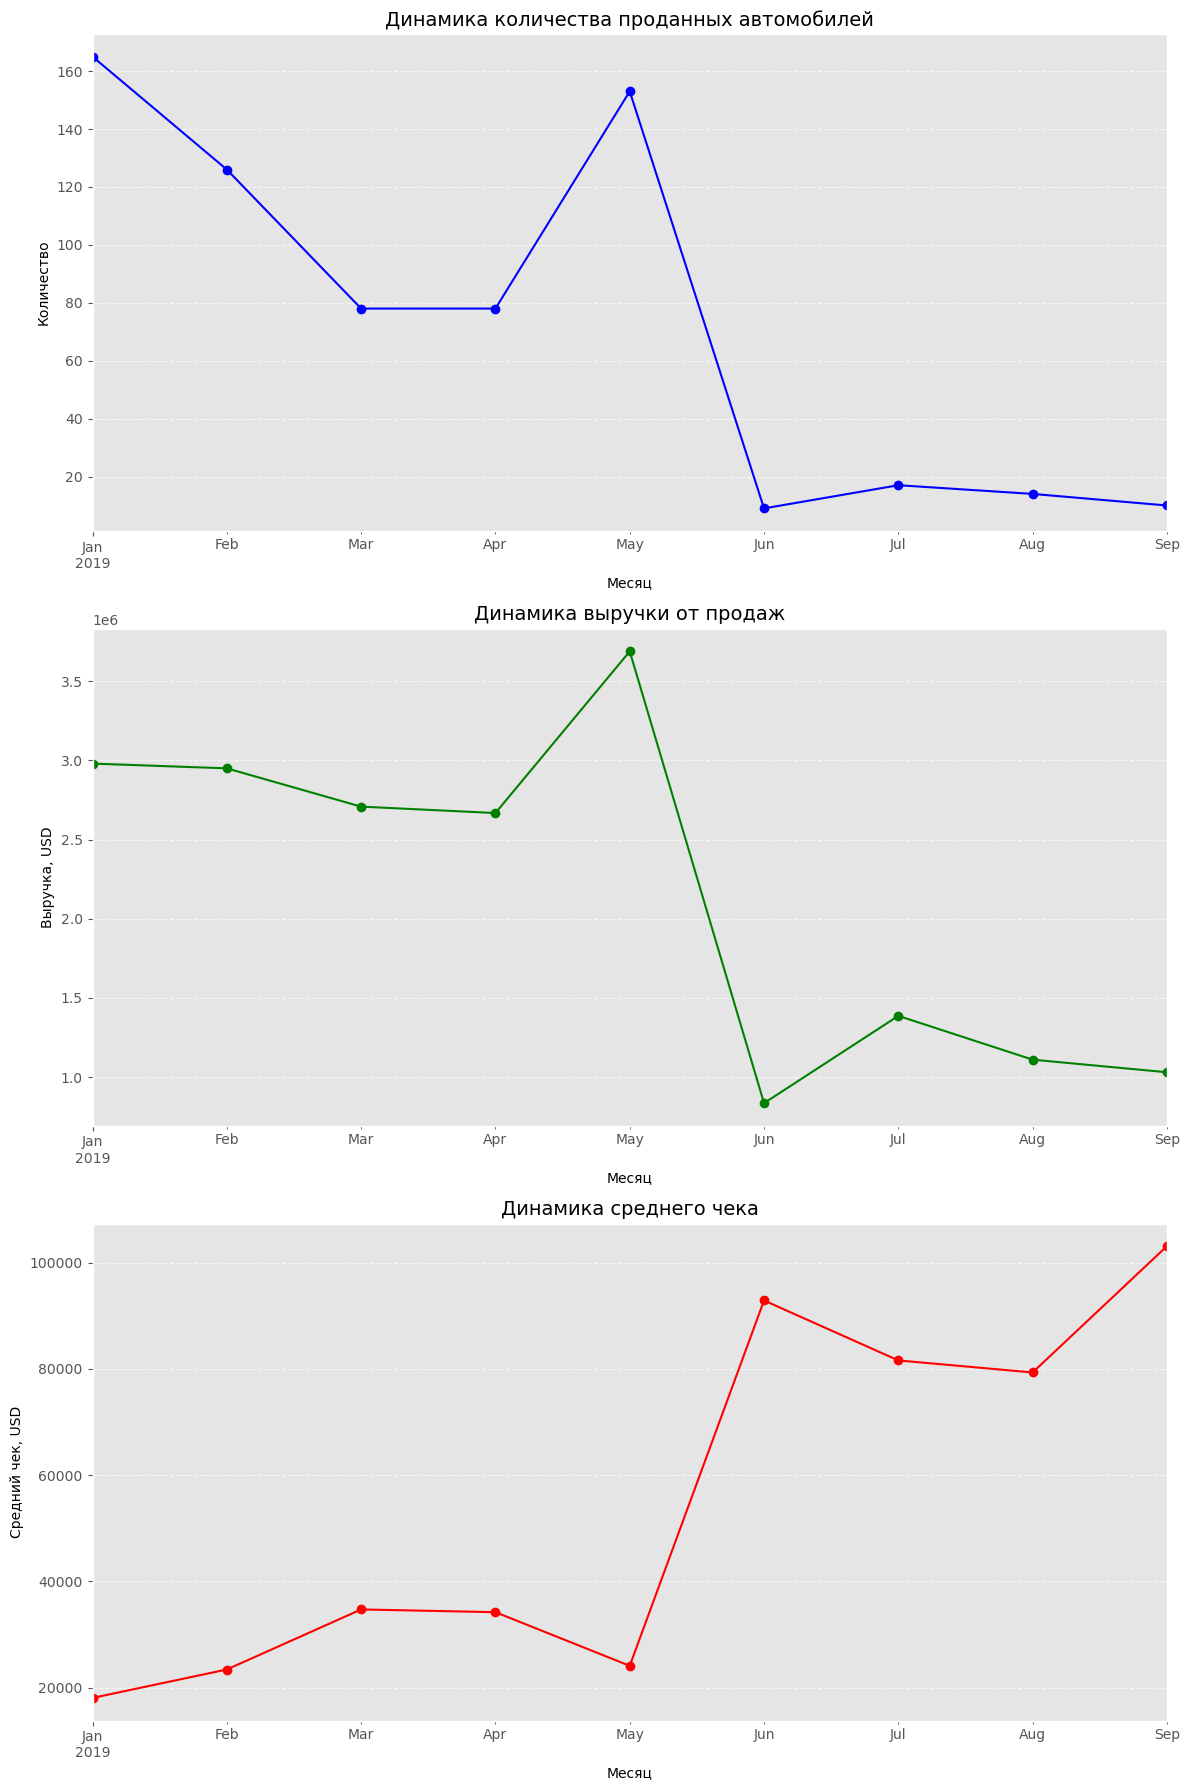

In [169]:
# строим графики
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# график количества
monthly_stats.plot(kind='line', ax=axes[0],
                   marker='o', y='total_quantity',
                   legend=False, color='blue')
axes[0].set_title('Динамика количества проданных автомобилей', fontsize=14)
axes[0].set_ylabel('Количество')

# график выручки
monthly_stats.plot(kind='line', ax=axes[1],
                   marker='o', y='total_revenue',
                   legend=False, color='green')
axes[1].set_title('Динамика выручки от продаж', fontsize=14)
axes[1].set_ylabel('Выручка, USD')

# график среднего чека
monthly_stats.plot(kind='line', ax=axes[2],
                   marker='o', y='mean_cheaсk',
                   legend=False, color='red')
axes[2].set_title('Динамика среднего чека', fontsize=14)
axes[2].set_ylabel('Средний чек, USD')


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Месяц')

plt.tight_layout()
plt.show()

У выручки и количества проданных авто есть пик в мае, затем резкий спад. А у среднего чека ситуация обратная. Т.е. количество проданных автомобилей сократилось, но стали продаваться более дорогие авто. Посмотрим на ассортимент Mercur Auto.

In [170]:
len(mercur_auto_df['brand'].unique())

3

In [171]:
len(mercur_auto_df['model'].unique())

23

В ассортименте Mercur Auto 3 бренда и 23 модели. Посмотрим прибыль по брендам.

In [172]:
monthly_stats = mercur_auto_df.groupby('brand').agg({'quantity':'sum', 'sale_price':'sum', 'price':'median'})
monthly_stats.columns = ['quantity', 'revenue', 'mean_price']
monthly_stats['ratio'] = monthly_stats['revenue']/monthly_stats['revenue'].sum()
monthly_stats.sort_values(by='quantity', ascending=False)

,quantity,revenue,mean_price,ratio
brand,,,,
Volkswagen,546,10182272.86,14793.56,0.53
Audi,52,4059490.43,78940.00,0.21
Porsche,52,5113512.70,94936.36,0.26


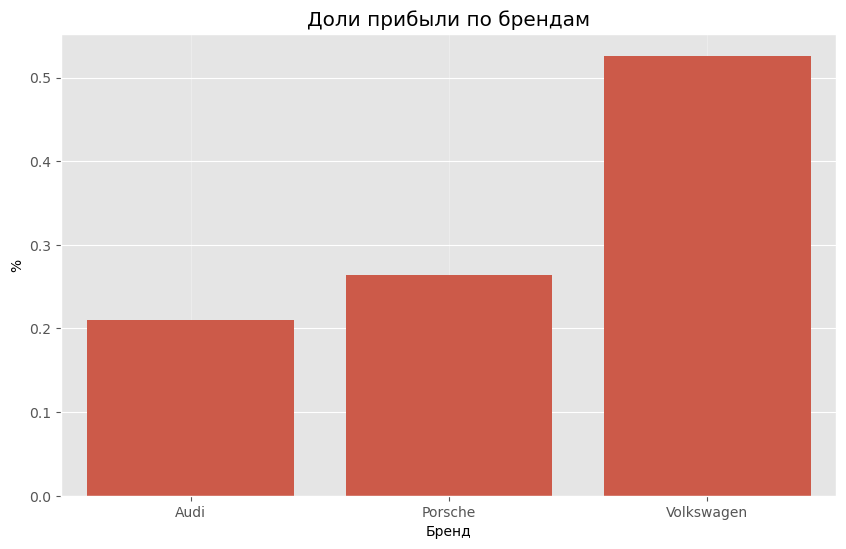

In [173]:
# строим график
plt.figure(figsize = (10,6))
sns.barplot(x='brand', y='ratio', data=monthly_stats)
plt.title('Доли прибыли по брендам')
plt.xlabel('Бренд')
plt.ylabel('%')
plt.grid(axis='x', alpha=0.3)
plt.show()

Наибольшую часть прибыли (53%) принес Volkswagen. Прибыль Audi и Porsche - 21% и 26% соответственно.

Найдем ТОП-5 моделей по количеству проданных.

In [174]:
monthly_stats = mercur_auto_df.groupby(['brand', 'model']).agg({'quantity':'sum', 'sale_price':'sum'})
monthly_stats.sort_values(by='quantity', ascending=False).head()

quantity  sale_price
brand      model                        
Volkswagen polo          440  6418764.24
           tiguan         81  2642563.72
Porsche    cayenne        28  2856255.46
Audi       q8             20  1793118.33
Porsche    macan          15  1015619.57

Самые продаваемые модели в Mercur Auto: Volkswagen polo, Volkswagen tiguan, Porsche cayenne, Audi q8 и Porsche macan.

Рассмотрим динамику продаж для каждого бренда.

In [175]:
# создаем сводную таблицу по месяцу продажи
monthly_stats = mercur_auto_df.groupby(['date_of_sale', 'brand']).agg({'quantity':'sum', 'sale_price':'sum'})

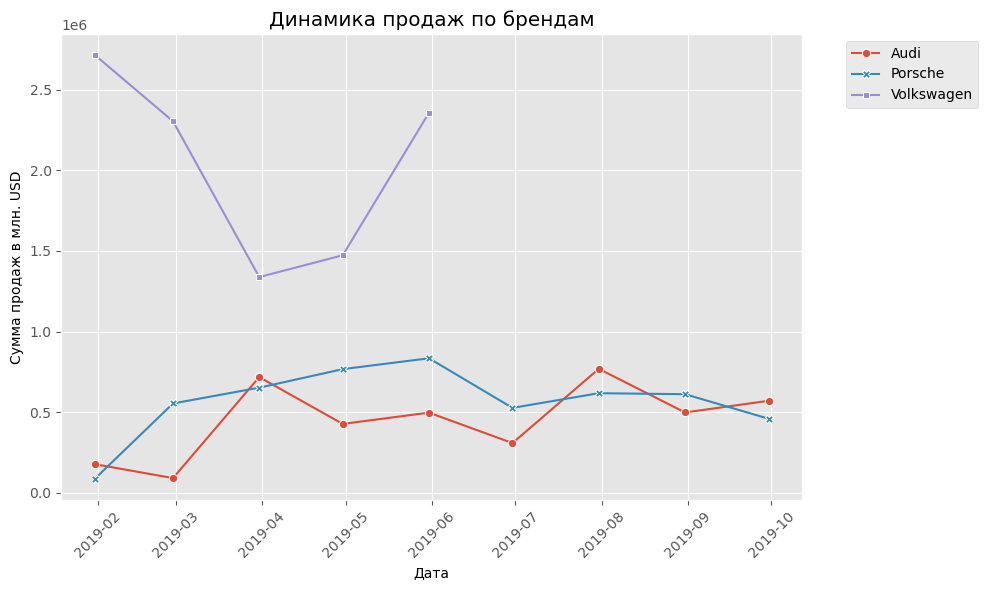

In [176]:
plt.figure(figsize = (10,6))
sns.lineplot(
    data=monthly_stats,
    x='date_of_sale',
    y='sale_price',
    hue='brand',
    style='brand',
    markers=True,
    dashes=False
)
plt.title('Динамика продаж по брендам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж в млн. USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Как видно из графика продажи бренда Volkswagen закончились в мае 2019 года. Этим обусловлен общий спад продаж в Mercur Auto.

## 5. Выводы.

Общие тенденции на рынке:

- Июль 2019 стал пиковым месяцем по количеству проданных автомобилей (53 875 шт.), выручке (1.35 млрд USD) и среднему чеку.

- Динамика продаж имеет сезонный характер: рост с февраля, пик в июле, затем спад.


Ключевые игроки и бренды:

- Toyota Motor Kazakhstan — лидер по выручке (479 млн USD), что обусловлено популярностью моделей (например, Toyota Camry — 4 853 продаж).

- Astana Motors и БИПЭК АВТО заняли второе и третье места с выручкой 229 млн USD и 186 млн USD соответственно.

Самые продаваемые модели:

- Toyota Camry (4 853 шт.)

- Lada Granta (3 664 шт.)

- Hyundai Tucson (3 271 шт.).

Распределение по категориям автомобилей:

- Внедорожники принесли наибольшую прибыль — 664 млн USD (49% от общей выручки).

- Легковые автомобили — 448 млн USD (33%).

- Коммерческий транспорт, пикапы и минивэны суммарно составили менее 20%.

География продаж:

- Алматы и Нур-Султан — ключевые города с выручкой 426 млн USD и 293 млн USD соответственно.

- Здесь же зафиксированы наибольшие средние чеки, что указывает на более высокую покупательную способность.

Анализ Mercur Auto.

Общие продажи: 650 автомобилей (193 млн USD).

Пик продаж пришелся на май 2019, после чего произошел резкий спад из-за прекращения продаж Volkswagen (53% выручки компании).

Несмотря на сокращение количества продаж, средний чек вырос за счет увеличения доли премиальных брендов: Porsche (26% выручки), Audi (21%).